#Importing and downloading the required libraries.

In [1]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.4 MB/s eta 0:00:00


In [2]:
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import probplot
from matplotlib.dates import DateFormatter
import math
import time
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import statsmodels.api as sm
from math import sqrt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings("ignore")
import unicodedata
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import Lasso
from sklearn.model_selection import validation_curve  #
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

In [3]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

#Data understanding.

In [4]:
df = pd.read_excel('/content/stock_tweets_selected_automobile.xlsx')

In [5]:
df.head() # Displaying the top5  records from the tweet datset.

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [6]:
df.shape #checking for the shape of the dataset.

(40699, 4)

In [7]:
df.columns #checking for the columns names in the tweets datset.

Index(['Date', 'Tweet', 'Stock Name', 'Company Name'], dtype='object')

In [8]:
df.info() #checking for the data types in the tweet dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40699 entries, 0 to 40698
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          40699 non-null  object
 1   Tweet         40699 non-null  object
 2   Stock Name    40699 non-null  object
 3   Company Name  40699 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


In [9]:
df.describe() #caluclatingthe dscriptive statistics for the tweet dataset.

,Date,Tweet,Stock Name,Company Name
count,40699,40699,40699,40699
unique,40132,40135,4,4
top,2021-11-11 01:54:37+00:00,$TSLA will triple in 2022 🚀🌕,TSLA,"Tesla, Inc."
freq,3,25,37422,37422


In [10]:
df['Stock Name'].value_counts() # checking for the values counts of the stock names present in the tweet datset.

TSLA    37422
NIO      3021
XPEV      225
F          31
Name: Stock Name, dtype: int64

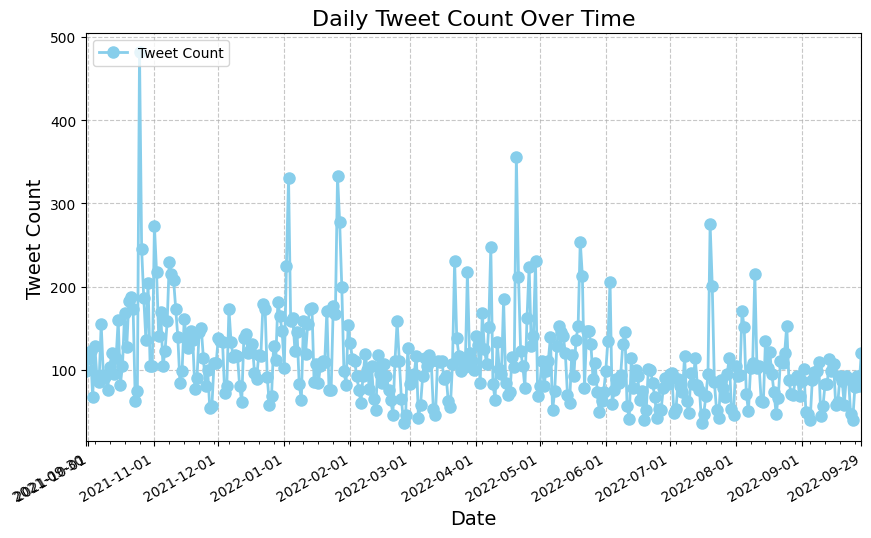

In [11]:
# Ploting the graph to check the distribution of tweets over time

df['Date'] = pd.to_datetime(df['Date']) #changing the date column to date date time format in the tweet dataset.
df.set_index('Date', inplace=True)

# Resampling tweets on a daily basis and ploting the distribution
daily_tweet_count = df['Tweet'].resample('D').count()

#customising the plot to make it informative.
plt.figure(figsize=(10, 6))
daily_tweet_count.plot(kind='line', color='skyblue', marker='o', linestyle='-', linewidth=2, markersize=8)

# Adding titles and labels for the plot.
plt.title('Daily Tweet Count Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Tweet Count', fontsize=14)

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Customizing x-axis date format for better readability
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.legend(['Tweet Count'], loc='upper left')


plt.show() # to visualise the graph.


In [12]:
#ploting a graph to visualise the distribution of tweet length across the tweets.
df['Tweet Length'] = df['Tweet'].apply(len) #creating a new variable in the dataset called Tweet length to store the length of each dataset.

# Create an interactive histogram using plotly
fig = px.histogram(df, x='Tweet Length', nbins=30, title='Distribution of Tweet Lengths',
                   labels={'Tweet Length': 'Tweet Length', 'count': 'Frequency'},
                   opacity=0.7, marginal='rug')

# Customize the layout
fig.update_layout(
    xaxis_title='Tweet Length',
    yaxis_title='Frequency',
    bargap=0.1,  # Adjusting the gap between bars
    showlegend=False  # Hiding the legend for better visibility
)
fig.show()

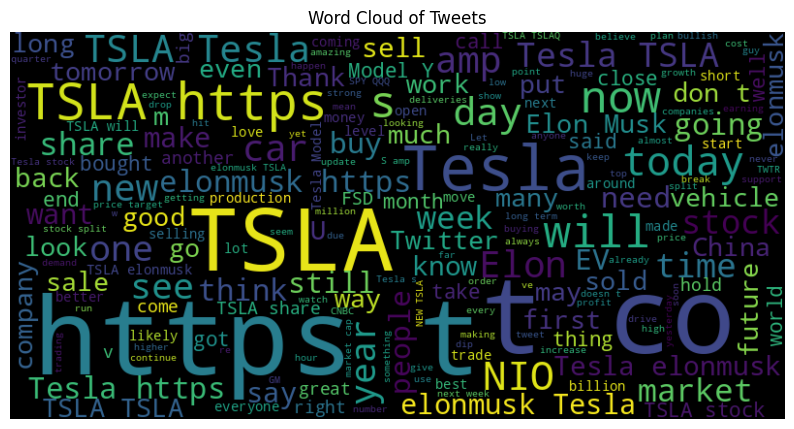

In [13]:
#  checking for the most commonly used words in tweets using word cloud.
from wordcloud import WordCloud

# Combining all tweets into a single string
all_tweets = ' '.join(df['Tweet'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_tweets)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()


In [14]:
import plotly.graph_objects as go
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_tweets)

# caluclating the word frequencies from the WordCloud object
word_frequencies = wordcloud.words_

# Creating a list of tuples sorted by frequency
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Extracting words and frequencies for plotting
words, frequencies = zip(*sorted_word_frequencies)

# Creating an interactive bar chart
fig = go.Figure(go.Bar(
    x=frequencies[:20],  # Displaing the top 20 words
    y=words[:20],
    orientation='h',
    marker=dict(color=frequencies[:20], colorscale='Viridis', reversescale=True),
))

# Customizing the layout
fig.update_layout(
    title='Top 20 Words in Tweets',
    xaxis_title='Frequency',
    yaxis_title='Words',
    template='plotly_dark',  # Dark theme for better visibility
)

# Show the interactive plot
fig.show()


In [15]:
#ploting a graph to visualise the number of tweet counts per company name.
company_counts = df['Company Name'].value_counts().reset_index() #caluclating values counts of tweets for each company.
company_counts.columns = ['Company Name', 'Number of Tweets']

# Creating an interactive bar chart using plotly
fig = px.bar(company_counts, x='Company Name', y='Number of Tweets', color='Number of Tweets',
             title='Distribution of Tweets Across Companies',
             labels={'Number of Tweets': 'Number of Tweets', 'Company Name': 'Company Name'})

# Customize the layout
fig.update_layout(
    xaxis_title='Company Name',
    yaxis_title='Number of Tweets',
    coloraxis_colorbar=dict(title='Number of Tweets'),
    showlegend=False  # Hiding the legend for better visibility
)

fig.show()


In [16]:
df.isnull().sum() #checking for null values in the tweet dataset.

Tweet           0
Stock Name      0
Company Name    0
Tweet Length    0
dtype: int64

In [17]:
# Checking for duplicated rows in the tweet dataset
duplicate_rows = df[df.duplicated()]
print("\nNumber of Duplicate Rows:", duplicate_rows.shape[0])


Number of Duplicate Rows: 154


#Sentiment Analysis.

Analyzing the sentiment using textblob

In [18]:
# Performing  sentiment analysis using a library called TextBlob.
from textblob import TextBlob

# defining a function to classify sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis to the 'Tweet' column in the tweet dataset.
df['Sentiment'] = df['Tweet'].apply(get_sentiment)



In [19]:
#ploting a graph to check the distribution of sentiment across the tweets.
sentiment_counts = df['Sentiment'].value_counts().reset_index() #caluclating the sentiment count for each sentiment Positive, negative, neutral.
sentiment_counts.columns = ['Sentiment', 'Number of Tweets']

# Creating an interactive bar chart using plotly
fig = px.bar(sentiment_counts, x='Sentiment', y='Number of Tweets', color='Number of Tweets',
             title='Distribution of Sentiments in Tweets',
             labels={'Number of Tweets': 'Number of Tweets', 'Sentiment': 'Sentiment'},
             color_discrete_sequence=['green', 'gray', 'red'])

# Customizing the layout
fig.update_layout(
    xaxis_title='Sentiment',
    yaxis_title='Number of Tweets',
    coloraxis_colorbar=dict(title='Number of Tweets'),
    showlegend=False  # Hiding the legend for better visibility
)

fig.show()


In [20]:
df['Sentiment'].value_counts() # printing the values counts of sentiments obtained after sentiment analysis.

Positive    20484
Neutral     12979
Negative     7236
Name: Sentiment, dtype: int64

#Using SentimentIntensityAnalyzer from Vadersentiment to caluclate the sentiment score


In [21]:
analyzer = SentimentIntensityAnalyzer()
analyzer

In [22]:
#creating a new Variable in the dataset to store the sentiment score.
df['Sentiment_score'] = df['Tweet'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

mean_sentiment = df['Sentiment_score'].mean() #caluclating the mean of the sentimenet score
std_sentiment = df['Sentiment_score'].std() # caluclating the Standard deviation of the sentiment score.
df['Z-Score'] = (df['Sentiment_score'] - mean_sentiment) / std_sentiment # caluclating the Z-score for sentiment score to check for the anomalies.

threshold = 2.0 #setting the threshold limit to 2.

anomalies = df[df['Z-Score'].abs() > threshold]

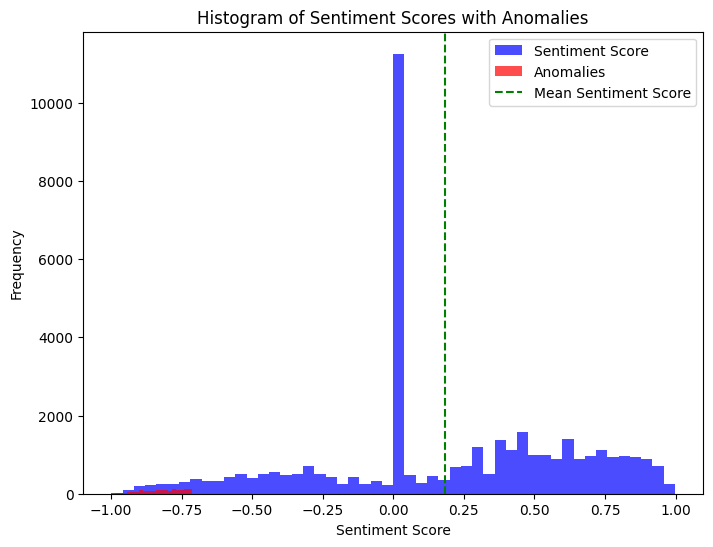

In [23]:
plt.figure(figsize=(8, 6))
plt.hist(df['Sentiment_score'], bins=50, color='blue', alpha=0.7, label='Sentiment Score')
plt.hist(anomalies['Sentiment_score'], bins=20, color='red', alpha=0.7, label='Anomalies')
plt.axvline(x=mean_sentiment, color='green', linestyle='--', label='Mean Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Scores with Anomalies')
plt.legend()
plt.show()

In [24]:
print("Sentiment Analysis Results:")
print(df)

Sentiment Analysis Results:
                                                                       Tweet  \
Date                                                                           
2022-09-29 23:41:16+00:00  Mainstream media has done an amazing job at br...   
2022-09-29 23:24:43+00:00  Tesla delivery estimates are at around 364k fr...   
2022-09-29 23:18:08+00:00  3/ Even if I include 63.0M unvested RSUs as of...   
2022-09-29 22:40:07+00:00  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...   
2022-09-29 22:27:05+00:00  @RealDanODowd @Tesla Stop trying to kill kids,...   
...                                                                      ...   
2021-10-07 17:11:57+00:00  Some of the fastest growing tech stocks on the...   
2021-10-04 17:05:59+00:00  With earnings on the horizon, here is a quick ...   
2021-10-01 04:43:41+00:00  Our record delivery results are a testimony of...   
2021-10-01 00:03:32+00:00  We delivered 10,412 Smart EVs in Sep 2021, rea...   
2021-09-30 1

In [25]:
print("\nAnomalies:")
print(anomalies)


Anomalies:
                                                                       Tweet  \
Date                                                                           
2022-09-29 22:40:07+00:00  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...   
2022-09-29 22:27:05+00:00  @RealDanODowd @Tesla Stop trying to kill kids,...   
2022-09-29 22:24:22+00:00  For years @WholeMarsBlog viciously silenced @T...   
2022-09-29 22:15:01+00:00  @MrJames__321 @KellyRoofing @TeslaSolar @elonm...   
2022-09-29 21:11:30+00:00  $TSLAQ: Tesla’s dead in Europe! Everyone else ...   
...                                                                      ...   
2021-10-07 16:35:26+00:00  $NIO here we freaking go people the misery nee...   
2021-10-01 11:33:08+00:00  If you completely sold out of $NIO it may not ...   
2022-08-25 01:53:36+00:00  Worst performing large cap stocks so far in 20...   
2022-05-10 08:08:04+00:00  🚨 $TSLA April shipments only 10,757 (-87% MoM)...   
2022-01-04 11:22:53+00:00  $

# ploting Word Cloud for Positive, Neutral, and Negative Sentiments

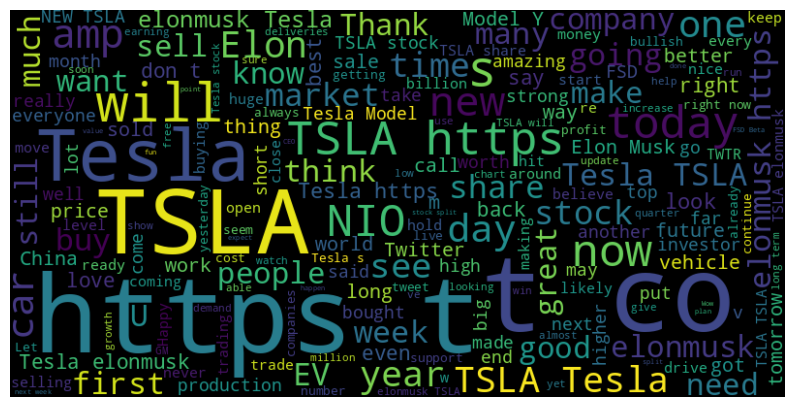

In [26]:
def plot_wordcloud(sentiment):
    words = ' '.join(df[df['Sentiment'] == sentiment]['Tweet'])
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

plot_wordcloud('Positive')


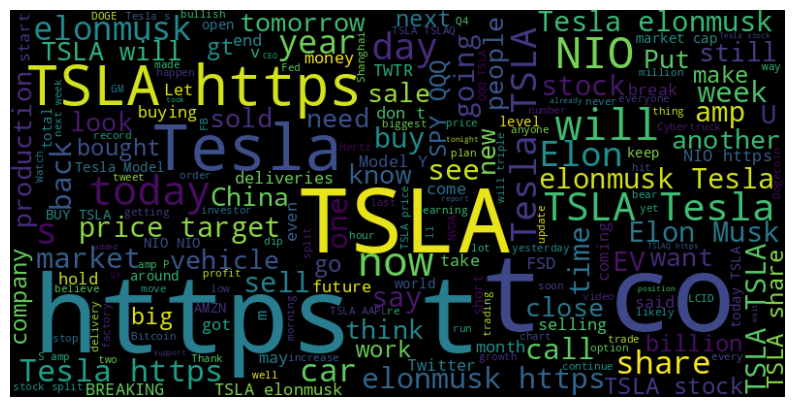

In [27]:
plot_wordcloud('Neutral')

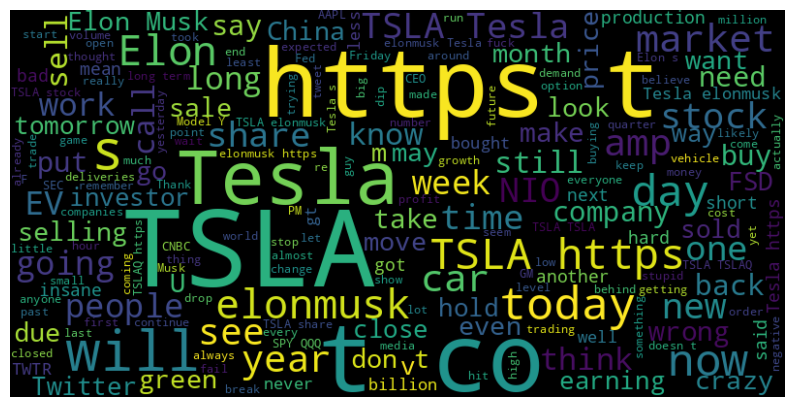

In [28]:
plot_wordcloud('Negative')

#Building a models for sentiment classification.

##Multinomial Naive Bayes classifier.

In [29]:
#spliting the into train and test dataset.
#selective using tweet and sentiment column as independent and dependent variable.
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Sentiment'], test_size=0.2, random_state=42)

# Converting text data to numerical features using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(tfidf_train, y_train)
naive_bayes_pred = naive_bayes.predict(tfidf_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_pred)
print("Naive Bayes Accuracy:", naive_bayes_accuracy)



Naive Bayes Accuracy: 0.5388206388206388


In [30]:
print("Classification Report:\n", classification_report(y_test, naive_bayes_pred))

Classification Report:
               precision    recall  f1-score   support

    Negative       0.95      0.01      0.03      1437
     Neutral       0.89      0.13      0.22      2650
    Positive       0.52      0.99      0.68      4053

    accuracy                           0.54      8140
   macro avg       0.79      0.38      0.31      8140
weighted avg       0.72      0.54      0.42      8140



In [31]:

print("Confusion Matrix:\n", confusion_matrix(y_test, naive_bayes_pred))

Confusion Matrix:
 [[  21   15 1401]
 [   1  340 2309]
 [   0   28 4025]]


In [32]:
# Calculating accuracy
accuracy = accuracy_score(y_test, naive_bayes_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculating precision, recall, and F1-score
precision = precision_score(y_test, naive_bayes_pred, average='weighted')
recall = recall_score(y_test, naive_bayes_pred, average='weighted')
f1 = f1_score(y_test, naive_bayes_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.5388
Precision: 0.7166
Recall: 0.5388
F1 Score: 0.4181


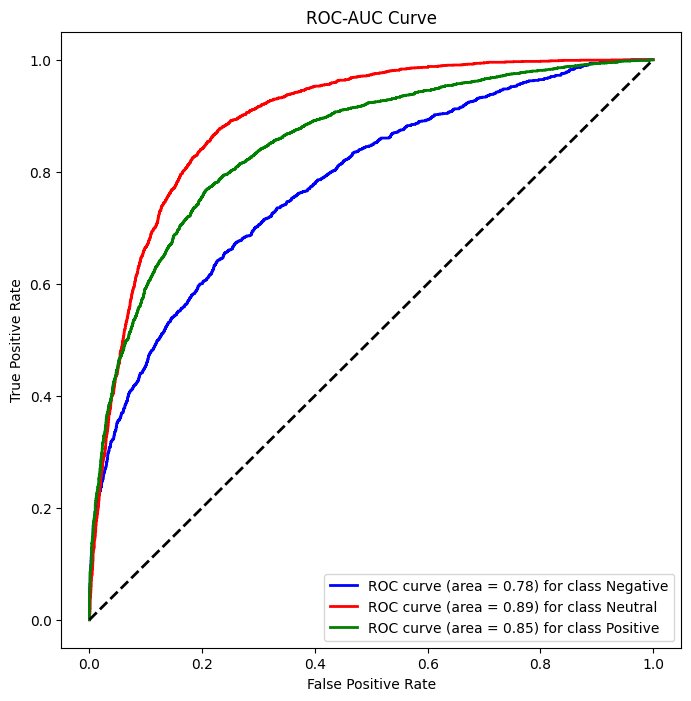

In [33]:
# defining a function to plot ROC-AUC curve
def plot_roc_curve(y_true, y_prob, classes):
    y_bin = label_binarize(y_true, classes=classes)
    n_classes = len(classes)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = cycle(['blue', 'red', 'green'])
    plt.figure(figsize=(8, 8))

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {classes[i]}')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Plotting the ROC-AUC Curve
y_prob = naive_bayes.predict_proba(tfidf_test)
plot_roc_curve(y_test, y_prob, classes=['Negative', 'Neutral', 'Positive'])

##Random Forest Classifier for text Classification.

In [34]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(tfidf_train, y_train)
random_forest_pred = random_forest.predict(tfidf_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
print("Random Forest Accuracy:", random_forest_accuracy)

Random Forest Accuracy: 0.7563882063882064


In [35]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Classification Report for Random Forest
print("Classification Report - Random Forest:\n", classification_report(y_test, random_forest_pred))


Classification Report - Random Forest:
               precision    recall  f1-score   support

    Negative       0.85      0.31      0.45      1437
     Neutral       0.74      0.83      0.78      2650
    Positive       0.76      0.87      0.81      4053

    accuracy                           0.76      8140
   macro avg       0.78      0.67      0.68      8140
weighted avg       0.77      0.76      0.74      8140



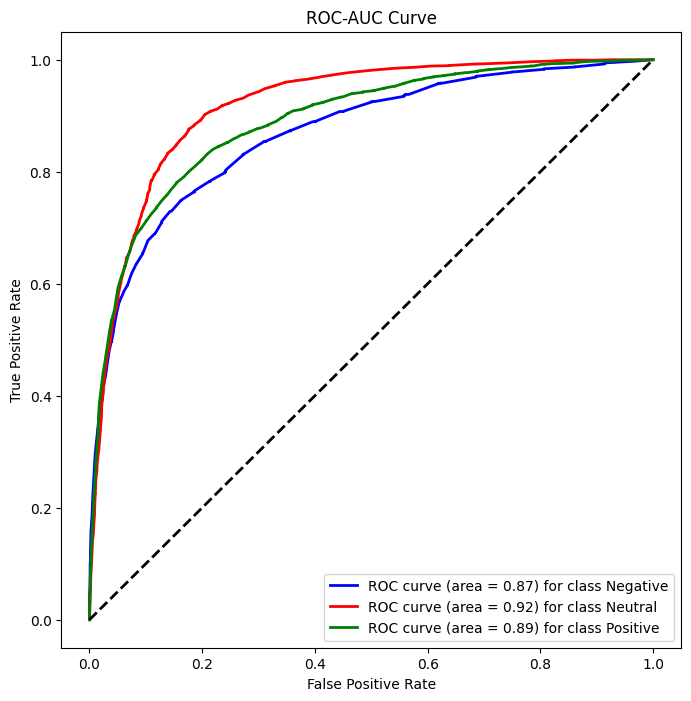

In [36]:
# ROC-AUC Curve for Random Forest
random_forest_prob = random_forest.predict_proba(tfidf_test)
plot_roc_curve(y_test, random_forest_prob, classes=['Negative', 'Neutral', 'Positive'])
plt.show()

##Support Vector Machine for Text Classification.

In [37]:
# Support Vector Machine
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(tfidf_train, y_train)
svm_pred = svm_classifier.predict(tfidf_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.8027027027027027


In [38]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Classification Report for SVM
print("Classification Report - SVM:\n", classification_report(y_test, svm_pred))

Classification Report - SVM:
               precision    recall  f1-score   support

    Negative       0.78      0.58      0.66      1437
     Neutral       0.77      0.86      0.81      2650
    Positive       0.83      0.84      0.84      4053

    accuracy                           0.80      8140
   macro avg       0.79      0.76      0.77      8140
weighted avg       0.80      0.80      0.80      8140



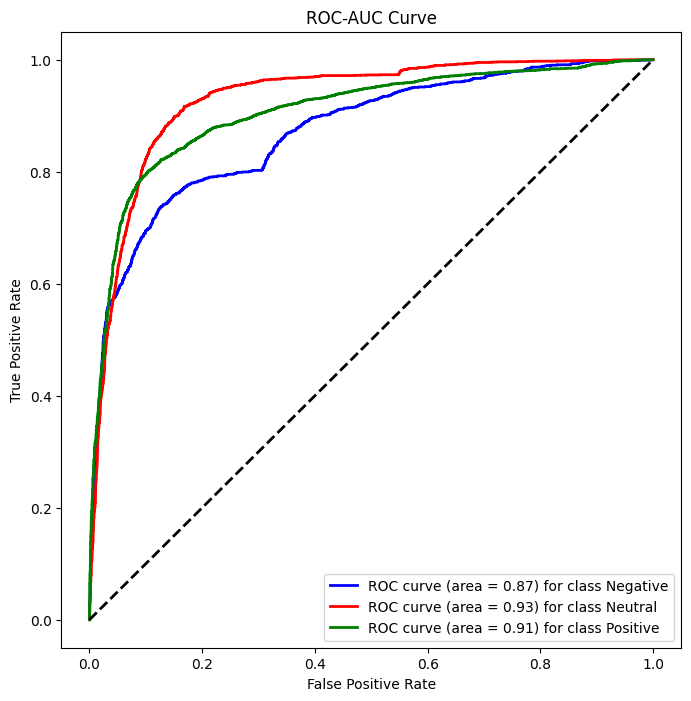

In [39]:
# ROC-AUC Curve for SVM
svm_prob = svm_classifier.decision_function(tfidf_test)
plot_roc_curve(y_test, svm_prob, classes=['Negative', 'Neutral', 'Positive'])
plt.show()


## descision tree Classifier for text classification

In [40]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(tfidf_train, y_train)
decision_tree_pred = decision_tree.predict(tfidf_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
print("Decision Tree Accuracy:", decision_tree_accuracy)

Decision Tree Accuracy: 0.6961916461916462


In [41]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Classification Report for Decision Tree
print("Classification Report - Decision Tree:\n", classification_report(y_test, decision_tree_pred))

Classification Report - Decision Tree:
               precision    recall  f1-score   support

    Negative       0.52      0.43      0.47      1437
     Neutral       0.67      0.76      0.72      2650
    Positive       0.77      0.75      0.76      4053

    accuracy                           0.70      8140
   macro avg       0.65      0.65      0.65      8140
weighted avg       0.69      0.70      0.69      8140



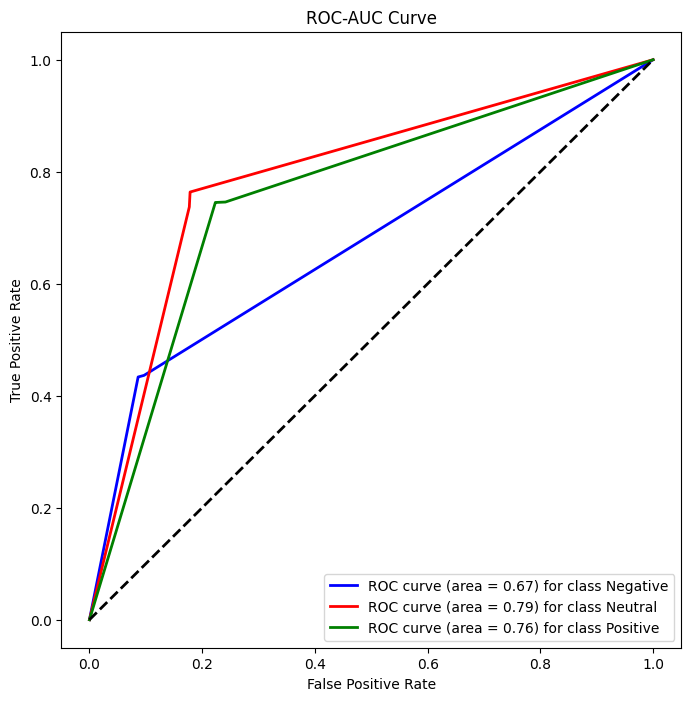

In [42]:
# ROC-AUC Curve for Decision Tree
decision_tree_prob = decision_tree.predict_proba(tfidf_test)
plot_roc_curve(y_test, decision_tree_prob, classes=['Negative', 'Neutral', 'Positive'])
plt.show()


## Knn for text classification.

In [43]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(tfidf_train, y_train)
knn_pred = knn_classifier.predict(tfidf_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

K-Nearest Neighbors Accuracy: 0.34705159705159705


In [44]:
# Classification Report for K-Nearest Neighbors
print("Classification Report - K-Nearest Neighbors:\n", classification_report(y_test, knn_pred))

Classification Report - K-Nearest Neighbors:
               precision    recall  f1-score   support

    Negative       0.57      0.05      0.09      1437
     Neutral       0.33      0.98      0.50      2650
    Positive       0.83      0.04      0.07      4053

    accuracy                           0.35      8140
   macro avg       0.58      0.36      0.22      8140
weighted avg       0.62      0.35      0.21      8140



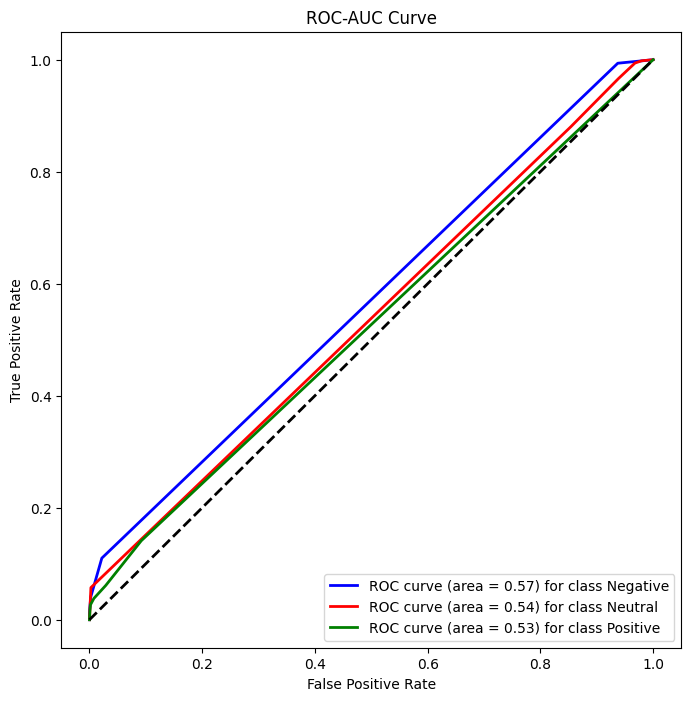

In [45]:
# ROC-AUC Curve for K-Nearest Neighbors
knn_prob = knn_classifier.predict_proba(tfidf_test)
plot_roc_curve(y_test, knn_prob, classes=['Negative', 'Neutral', 'Positive'])
plt.show()

## Compare and visualize the accuracies

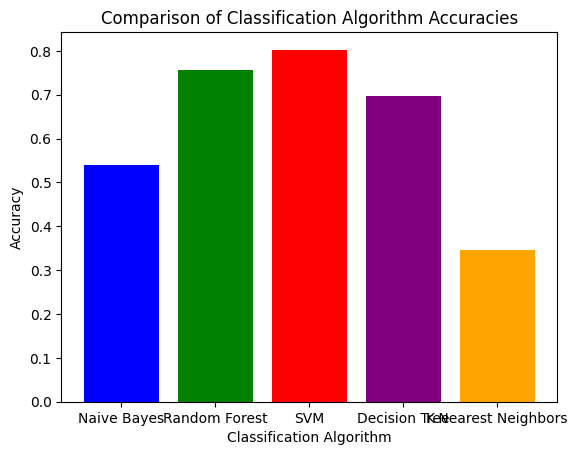

In [46]:
accuracies = {
    'Naive Bayes': naive_bayes_accuracy,
    'Random Forest': random_forest_accuracy,
    'SVM': svm_accuracy,
    'Decision Tree': decision_tree_accuracy,
    'K-Nearest Neighbors': knn_accuracy
}

plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Comparison of Classification Algorithm Accuracies')
plt.xlabel('Classification Algorithm')
plt.ylabel('Accuracy')
plt.show()


# checking for few more sentimental analysis metrices.

In [47]:
# Making a copy of dataset in order to prevent the data loss and creating a empty columns to store the values in it going further.
df2 = df.copy()
df2["Sentiment_score"] = ''
df2["Negative"] = ''
df2["Neutral"] = ''
df2["Positive"] = ''
df2.head()

,Tweet,Stock Name,Company Name,Tweet Length,Sentiment,Sentiment_score,Z-Score,Negative,Neutral,Positive
Date,,,,,,,,,,
2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",288,Positive,,-0.233006,,,
2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",68,Neutral,,-0.405396,,,
2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",252,Positive,,0.255584,,,
2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",212,Positive,,-2.095361,,,
2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",71,Negative,,-2.359307,,,


In [48]:
tweet = df['Tweet']

In [49]:
tweet

Date
2022-09-29 23:41:16+00:00    Mainstream media has done an amazing job at br...
2022-09-29 23:24:43+00:00    Tesla delivery estimates are at around 364k fr...
2022-09-29 23:18:08+00:00    3/ Even if I include 63.0M unvested RSUs as of...
2022-09-29 22:40:07+00:00    @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...
2022-09-29 22:27:05+00:00    @RealDanODowd @Tesla Stop trying to kill kids,...
                                                   ...                        
2021-10-07 17:11:57+00:00    Some of the fastest growing tech stocks on the...
2021-10-04 17:05:59+00:00    With earnings on the horizon, here is a quick ...
2021-10-01 04:43:41+00:00    Our record delivery results are a testimony of...
2021-10-01 00:03:32+00:00    We delivered 10,412 Smart EVs in Sep 2021, rea...
2021-09-30 10:22:52+00:00    Why can XPeng P5 deliver outstanding performan...
Name: Tweet, Length: 40699, dtype: object

In [50]:
df2.T

Date,2022-09-29 23:41:16+00:00,2022-09-29 23:24:43+00:00,2022-09-29 23:18:08+00:00,2022-09-29 22:40:07+00:00,2022-09-29 22:27:05+00:00,2022-09-29 22:25:53+00:00,2022-09-29 22:24:22+00:00,2022-09-29 22:23:54+00:00,2022-09-29 22:23:28+00:00,2022-09-29 22:15:01+00:00,...,2021-10-14 05:45:14+00:00,2021-10-13 16:47:19+00:00,2021-10-12 00:49:51+00:00,2021-10-11 03:51:36+00:00,2021-10-09 00:18:25+00:00,2021-10-07 17:11:57+00:00,2021-10-04 17:05:59+00:00,2021-10-01 04:43:41+00:00,2021-10-01 00:03:32+00:00,2021-09-30 10:22:52+00:00
Tweet,Mainstream media has done an amazing job at br...,Tesla delivery estimates are at around 364k fr...,3/ Even if I include 63.0M unvested RSUs as of...,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,"@RealDanODowd @Tesla Stop trying to kill kids,...",@RealDanODowd @Tesla This is you https://t.co/...,For years @WholeMarsBlog viciously silenced @T...,$NIO just because I'm down money doesn't mean ...,50 likes for some $SPY $TSLA charts to study!\...,@MrJames__321 @KellyRoofing @TeslaSolar @elonm...,...,🐳 🚨Whale Watchlist🚨🐳\n\n🌊@SharkofTraders Follo...,XPeng P7 tops Sept sales among new EV makers i...,Glocks Watch (1/2)\n\n$F 15.5c &gt; 15.36 | 14...,"NIO reached 100,000 vehicle rolled off the pro...","Update on Apple, Tesla, Nio, $QQQ, $SPY, ROKU,...",Some of the fastest growing tech stocks on the...,"With earnings on the horizon, here is a quick ...",Our record delivery results are a testimony of...,"We delivered 10,412 Smart EVs in Sep 2021, rea...",Why can XPeng P5 deliver outstanding performan...
Stock Name,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,...,XPEV,XPEV,XPEV,XPEV,XPEV,XPEV,XPEV,XPEV,XPEV,XPEV
Company Name,"Tesla, Inc.","Tesla, Inc.","Tesla, Inc.","Tesla, Inc.","Tesla, Inc.","Tesla, Inc.","Tesla, Inc.","Tesla, Inc.","Tesla, Inc.","Tesla, Inc.",...,XPeng Inc.,XPeng Inc.,XPeng Inc.,XPeng Inc.,XPeng Inc.,XPeng Inc.,XPeng Inc.,XPeng Inc.,XPeng Inc.,XPeng Inc.
Tweet Length,288,68,252,212,71,56,300,212,49,170,...,282,150,194,204,280,137,245,225,291,233
Sentiment,Positive,Neutral,Positive,Positive,Negative,Neutral,Negative,Positive,Neutral,Negative,...,Positive,Positive,Positive,Neutral,Neutral,Neutral,Positive,Neutral,Positive,Positive
Sentiment_score,,,,,,,,,,,...,,,,,,,,,,
Z-Score,-0.233006,-0.405396,0.255584,-2.095361,-2.359307,-0.405396,-2.495299,0.152864,0.655968,-2.331394,...,0.305157,0.734794,0.984002,1.042954,0.447179,-0.008138,0.447179,0.53583,0.805582,1.332579
Negative,,,,,,,,,,,...,,,,,,,,,,
Neutral,,,,,,,,,,,...,,,,,,,,,,
Positive,,,,,,,,,,,...,,,,,,,,,,


In [51]:
%%time
sentiment_analyzer = SentimentIntensityAnalyzer()

for indx, row in df2.iterrows():
    try:
        sentence_i = unicodedata.normalize('NFKD', row['Tweet'])
        sentence_sentiment = sentiment_analyzer.polarity_scores(sentence_i)
        df2.at[indx, 'Sentiment_score'] = sentence_sentiment['compound']
        df2.at[indx, 'Negative'] = sentence_sentiment['neg']
        df2.at[indx, 'Neutral'] = sentence_sentiment['neu']
        df2.at[indx, 'Positive'] = sentence_sentiment['pos']
    except TypeError:
        print(df2.loc[indexx, 'Tweet'])
        print(indx)
        break

CPU times: user 1min 14s, sys: 214 ms, total: 1min 14s
Wall time: 1min 15s


In [52]:
df2.head()

,Tweet,Stock Name,Company Name,Tweet Length,Sentiment,Sentiment_score,Z-Score,Negative,Neutral,Positive
Date,,,,,,,,,,
2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",288,Positive,0.0772,-0.233006,0.125,0.763,0.113
2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",68,Neutral,0.0,-0.405396,0.0,1.0,0.0
2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",252,Positive,0.296,0.255584,0.0,0.954,0.046
2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",212,Positive,-0.7568,-2.095361,0.273,0.59,0.137
2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",71,Negative,-0.875,-2.359307,0.526,0.474,0.0


In [53]:
df2.reset_index(inplace=True)


In [54]:
df2.head()

,Date,Tweet,Stock Name,Company Name,Tweet Length,Sentiment,Sentiment_score,Z-Score,Negative,Neutral,Positive
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",288,Positive,0.0772,-0.233006,0.125,0.763,0.113
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",68,Neutral,0.0,-0.405396,0.0,1.0,0.0
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",252,Positive,0.296,0.255584,0.0,0.954,0.046
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",212,Positive,-0.7568,-2.095361,0.273,0.59,0.137
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",71,Negative,-0.875,-2.359307,0.526,0.474,0.0


In [55]:
df2['Date'] = pd.to_datetime(df2['Date'])
print(df2.head())
df2['Date'] = df2['Date'].dt.date
print(df2['Date'].head())


                       Date  \
0 2022-09-29 23:41:16+00:00   
1 2022-09-29 23:24:43+00:00   
2 2022-09-29 23:18:08+00:00   
3 2022-09-29 22:40:07+00:00   
4 2022-09-29 22:27:05+00:00   

                                               Tweet Stock Name Company Name  \
0  Mainstream media has done an amazing job at br...       TSLA  Tesla, Inc.   
1  Tesla delivery estimates are at around 364k fr...       TSLA  Tesla, Inc.   
2  3/ Even if I include 63.0M unvested RSUs as of...       TSLA  Tesla, Inc.   
3  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA  Tesla, Inc.   
4  @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA  Tesla, Inc.   

   Tweet Length Sentiment Sentiment_score   Z-Score Negative Neutral Positive  
0           288  Positive          0.0772 -0.233006    0.125   0.763    0.113  
1            68   Neutral             0.0 -0.405396      0.0     1.0      0.0  
2           252  Positive           0.296  0.255584      0.0   0.954    0.046  
3           

In [56]:
tweetdata= df2.copy()
tweetdata.head()

,Date,Tweet,Stock Name,Company Name,Tweet Length,Sentiment,Sentiment_score,Z-Score,Negative,Neutral,Positive
0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",288,Positive,0.0772,-0.233006,0.125,0.763,0.113
1,2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",68,Neutral,0.0,-0.405396,0.0,1.0,0.0
2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",252,Positive,0.296,0.255584,0.0,0.954,0.046
3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",212,Positive,-0.7568,-2.095361,0.273,0.59,0.137
4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",71,Negative,-0.875,-2.359307,0.526,0.474,0.0


In [57]:
tweetdata = tweetdata[['Date','Tweet','Sentiment_score']]

In [58]:
tweetdata.head()

,Date,Tweet,Sentiment_score
0,2022-09-29,Mainstream media has done an amazing job at br...,0.0772
1,2022-09-29,Tesla delivery estimates are at around 364k fr...,0.0
2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,0.296
3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,-0.7568
4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",-0.875


In [59]:
tweetdata.shape

(40699, 3)

# Migration of stock data and tweet data.

In [60]:
stocks = pd.read_csv('/content/automobile_stocks.csv')

In [61]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500,TSLA
1,2022-10-27,229.770004,233.809998,222.850006,225.089996,225.089996,61638800,TSLA
2,2022-10-28,225.399994,228.860001,216.350006,228.520004,228.520004,69152400,TSLA
3,2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300,TSLA
4,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800,TSLA


In [62]:
stocks.shape

(4723, 8)

In [63]:
stocks['Stock Name'].value_counts()

TSLA    3463
MSFT     252
NFLX     252
F        252
NIO      252
XPEV     252
Name: Stock Name, dtype: int64

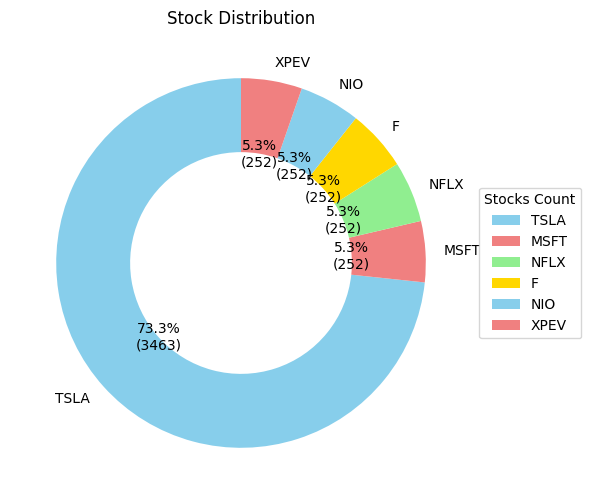

In [64]:
# Counting the occurrences of each stock
stock_counts = stocks['Stock Name'].value_counts()

# Calculating percentages and creating a custom autopct function
def func(pct, values):
    count = int(round(pct/100.*sum(values)))
    return f"{pct:.1f}%\n({count})"

# Plotting the pie chart with legend and custom autopct
plt.figure(figsize=(7, 6))
patches, texts, autotexts = plt.pie(stock_counts, labels=stock_counts.index, autopct=lambda pct: func(pct, stock_counts),
                                    startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'], wedgeprops=dict(width=0.4))

# Adding legend
plt.legend(patches, stock_counts.index, title='Stocks Count', loc='center left', bbox_to_anchor=(1, 0.5))

# Adding a title
plt.title('Stock Distribution')
plt.show()

In [65]:
stock_name = ['TSLA','NIO','XPEV','F']
stock_names_to_select = ['TSLA', 'NIO', 'XPEV', 'F']
selected_rows = stocks[stocks['Stock Name'].isin(stock_names_to_select)]

In [66]:
stock_df = selected_rows

In [67]:
stock_df.shape

(4219, 8)

In [68]:
stock_df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Adj Close     float64
Volume          int64
Stock Name     object
dtype: object

In [69]:
final_df = stock_df.merge(tweetdata, on='Date', how='left')
final_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Tweet,Sentiment_score
0,2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500,TSLA,NaN,NaN
1,2022-10-27,229.770004,233.809998,222.850006,225.089996,225.089996,61638800,TSLA,NaN,NaN
2,2022-10-28,225.399994,228.860001,216.350006,228.520004,228.520004,69152400,TSLA,NaN,NaN
3,2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300,TSLA,NaN,NaN
4,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800,TSLA,NaN,NaN


In [70]:
final_df = final_df.drop(columns=['Stock Name'])

In [71]:
final_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Tweet,Sentiment_score
0,2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500,NaN,NaN
1,2022-10-27,229.770004,233.809998,222.850006,225.089996,225.089996,61638800,NaN,NaN
2,2022-10-28,225.399994,228.860001,216.350006,228.520004,228.520004,69152400,NaN,NaN
3,2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300,NaN,NaN
4,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800,NaN,NaN


In [72]:
df.reset_index(inplace=True)

In [73]:
df.head(2)

,Date,Tweet,Stock Name,Company Name,Tweet Length,Sentiment,Sentiment_score,Z-Score
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",288,Positive,0.0772,-0.233006
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",68,Neutral,0.0000,-0.405396


In [74]:
df['Date'] = pd.to_datetime(df['Date'])
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

In [75]:
df.head(2)

,Date,Tweet,Stock Name,Company Name,Tweet Length,Sentiment,Sentiment_score,Z-Score
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",288,Positive,0.0772,-0.233006
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",68,Neutral,0.0000,-0.405396


In [76]:
df.shape

(40699, 8)

In [77]:
stock_df.shape

(4219, 8)

In [78]:
df['Date'] = df['Date'].dt.date

In [79]:
df.head()

,Date,Tweet,Stock Name,Company Name,Tweet Length,Sentiment,Sentiment_score,Z-Score
0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",288,Positive,0.0772,-0.233006
1,2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",68,Neutral,0.0000,-0.405396
2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",252,Positive,0.2960,0.255584
3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",212,Positive,-0.7568,-2.095361
4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",71,Negative,-0.8750,-2.359307


In [80]:
stock_df['Stock Name'].value_counts()

TSLA    3463
F        252
NIO      252
XPEV     252
Name: Stock Name, dtype: int64

In [81]:
stocks['Date']

0       2022-10-26
1       2022-10-27
2       2022-10-28
3       2022-10-31
4       2022-11-01
           ...    
4718    2022-03-18
4719    2022-03-21
4720    2022-03-22
4721    2022-03-23
4722    2022-03-24
Name: Date, Length: 4723, dtype: object

In [82]:
stocks['Date'] = pd.to_datetime(stocks['Date'])
df['Date'] = pd.to_datetime(df['Date'])

In [83]:
merged_df = pd.merge(stocks, df, on=['Date', 'Stock Name'], how='inner')
merged_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Tweet,Company Name,Tweet Length,Sentiment,Sentiment_score,Z-Score
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,#LottoFriday Watchlist: short &amp; sweet\n\n$...,"Tesla, Inc.",240,Positive,0.8478,1.487776
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,CORRECTION UPDATE\n\nUPDATE on Q3 Delivery Est...,"Tesla, Inc.",296,Neutral,-0.1531,-0.747275
2,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,FREE #OPTIONS Ideas 🤯\n\nScale out when above ...,"Tesla, Inc.",317,Positive,0.9083,1.622875
3,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,California DMV today issued autonomous vehicle...,"Tesla, Inc.",272,Positive,0.0000,-0.405396
4,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,@chamath Appreciate the clarification @chamath...,"Tesla, Inc.",196,Positive,0.4019,0.492063


In [84]:
max(stocks['Date']),max(df['Date'])

(Timestamp('2023-10-27 00:00:00'), Timestamp('2022-09-29 00:00:00'))

In [85]:
merged_df.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Stock Name         0
Tweet              0
Company Name       0
Tweet Length       0
Sentiment          0
Sentiment_score    0
Z-Score            0
dtype: int64

In [86]:
merged_df.duplicated().sum()

13

In [87]:
merged_df.drop_duplicates(inplace=True)

In [88]:
merged_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Tweet,Company Name,Tweet Length,Sentiment,Sentiment_score,Z-Score
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,#LottoFriday Watchlist: short &amp; sweet\n\n$...,"Tesla, Inc.",240,Positive,0.8478,1.487776
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,CORRECTION UPDATE\n\nUPDATE on Q3 Delivery Est...,"Tesla, Inc.",296,Neutral,-0.1531,-0.747275
2,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,FREE #OPTIONS Ideas 🤯\n\nScale out when above ...,"Tesla, Inc.",317,Positive,0.9083,1.622875
3,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,California DMV today issued autonomous vehicle...,"Tesla, Inc.",272,Positive,0.0000,-0.405396
4,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,@chamath Appreciate the clarification @chamath...,"Tesla, Inc.",196,Positive,0.4019,0.492063


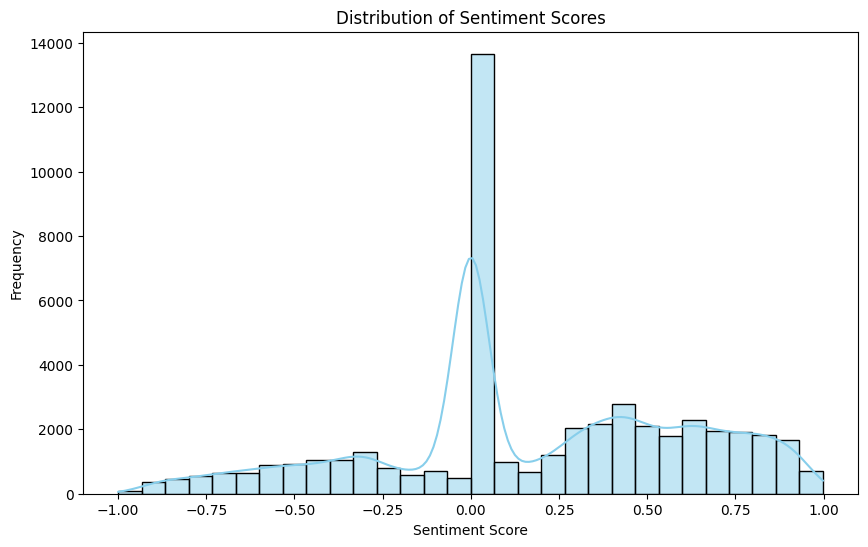

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Sentiment_score'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [90]:
import os

# Specify the directory path
directory_path = '/content/tweet_data'

# Create the directory if it doesn't exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Save the DataFrame to a CSV file
file_path = os.path.join(directory_path, 'merged_df.csv')
merged_df.to_csv(file_path, index=False)


# Data understanding of merged data

In [91]:
data = pd.read_csv('/content/tweet_data/merged_df.csv')

In [92]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Tweet,Company Name,Tweet Length,Sentiment,Sentiment_score,Z-Score
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,#LottoFriday Watchlist: short &amp; sweet\n\n$...,"Tesla, Inc.",240,Positive,0.8478,1.487776
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,CORRECTION UPDATE\n\nUPDATE on Q3 Delivery Est...,"Tesla, Inc.",296,Neutral,-0.1531,-0.747275
2,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,FREE #OPTIONS Ideas 🤯\n\nScale out when above ...,"Tesla, Inc.",317,Positive,0.9083,1.622875
3,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,California DMV today issued autonomous vehicle...,"Tesla, Inc.",272,Positive,0.0000,-0.405396
4,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,@chamath Appreciate the clarification @chamath...,"Tesla, Inc.",196,Positive,0.4019,0.492063


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48300 entries, 0 to 48299
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             48300 non-null  object 
 1   Open             48300 non-null  float64
 2   High             48300 non-null  float64
 3   Low              48300 non-null  float64
 4   Close            48300 non-null  float64
 5   Adj Close        48300 non-null  float64
 6   Volume           48300 non-null  int64  
 7   Stock Name       48300 non-null  object 
 8   Tweet            48300 non-null  object 
 9   Company Name     48300 non-null  object 
 10  Tweet Length     48300 non-null  int64  
 11  Sentiment        48300 non-null  object 
 12  Sentiment_score  48300 non-null  float64
 13  Z-Score          48300 non-null  float64
dtypes: float64(7), int64(2), object(5)
memory usage: 5.2+ MB


In [94]:
data.shape

(48300, 14)

In [95]:
data.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Stock Name         0
Tweet              0
Company Name       0
Tweet Length       0
Sentiment          0
Sentiment_score    0
Z-Score            0
dtype: int64

In [96]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Stock Name', 'Tweet', 'Company Name', 'Tweet Length', 'Sentiment',
       'Sentiment_score', 'Z-Score'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x7b998ced7f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7b998ced4fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b998ced7b80>,
 'medians': [<matplotlib.lines.Line2D at 0x7b998ce56770>,
 'fliers': [<matplotlib.lines.Line2D at 0x7b998ce56860>,
 'means': []}

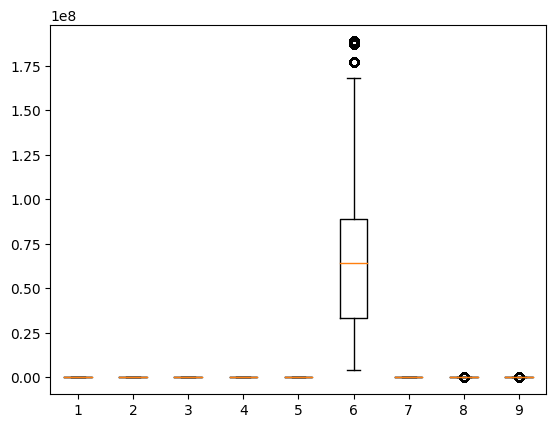

In [97]:
plt.boxplot(data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Tweet Length', 'Sentiment_score', 'Z-Score']])

# Preprocessing of merged dataset.

In [98]:
data['Date'] = pd.to_datetime(data['Date'])

In [99]:
# Extracting features from the date
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month

In [100]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Stock Name', 'Tweet', 'Company Name', 'Tweet Length', 'Sentiment',
       'Sentiment_score', 'Z-Score', 'DayOfWeek', 'Month'],
      dtype='object')

In [101]:
numerical_cols = ['Open', 'High', 'Low', 'Adj Close','Close', 'Volume', 'Tweet Length', 'Sentiment_score', 'Z-Score']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [102]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Tweet,Company Name,Tweet Length,Sentiment,Sentiment_score,Z-Score,DayOfWeek,Month
0,2021-09-30,-0.740403,-0.752144,-0.724221,-0.744126,-0.744124,-0.337634,TSLA,#LottoFriday Watchlist: short &amp; sweet\n\n$...,"Tesla, Inc.",0.917469,Positive,1.510395,1.510395,3,9
1,2021-09-30,-0.740403,-0.752144,-0.724221,-0.744126,-0.744124,-0.337634,TSLA,CORRECTION UPDATE\n\nUPDATE on Q3 Delivery Est...,"Tesla, Inc.",1.555571,Neutral,-0.738973,-0.738973,3,9
2,2021-09-30,-0.740403,-0.752144,-0.724221,-0.744126,-0.744124,-0.337634,TSLA,FREE #OPTIONS Ideas 🤯\n\nScale out when above ...,"Tesla, Inc.",1.794859,Positive,1.646359,1.646359,3,9
3,2021-09-30,-0.740403,-0.752144,-0.724221,-0.744126,-0.744124,-0.337634,TSLA,California DMV today issued autonomous vehicle...,"Tesla, Inc.",1.282098,Positive,-0.394905,-0.394905,3,9
4,2021-09-30,-0.740403,-0.752144,-0.724221,-0.744126,-0.744124,-0.337634,TSLA,@chamath Appreciate the clarification @chamath...,"Tesla, Inc.",0.416103,Positive,0.508303,0.508303,3,9


{'whiskers': [<matplotlib.lines.Line2D at 0x7b9993ba0760>,
 'caps': [<matplotlib.lines.Line2D at 0x7b9993ba3310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b9993ba32e0>,
 'medians': [<matplotlib.lines.Line2D at 0x7b9993ba2890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7b9993ba1570>,
 'means': []}

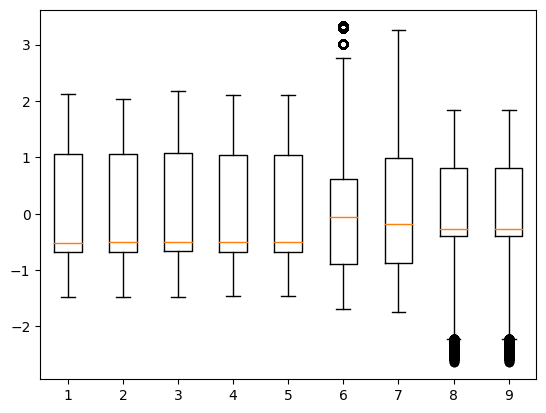

In [103]:
plt.boxplot(data[['Open', 'High', 'Low','Close', 'Adj Close', 'Volume', 'Tweet Length', 'Sentiment_score', 'Z-Score']])

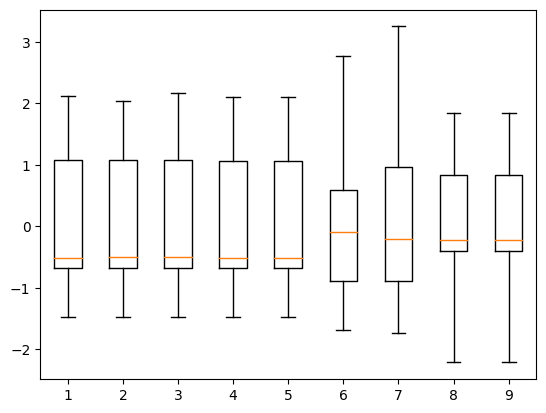

In [104]:
import numpy as np

numerical_features = ['Open', 'High', 'Low','Close', 'Adj Close', 'Volume', 'Tweet Length', 'Sentiment_score', 'Z-Score']

# Calculating Q1, Q3, and IQR
Q1 = data[numerical_features].quantile(0.25)
Q3 = data[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Creating a boolean mask for outliers
outliers = ((data[numerical_features] < (Q1 - 1.5 * IQR)) | (data[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)

# Droping rows with outliers
data1 = data[~outliers]

# Optional: Plot boxplots for the cleaned data to verify
import matplotlib.pyplot as plt
plt.boxplot(data1[numerical_features])
plt.show()

In [105]:
data.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Stock Name         0
Tweet              0
Company Name       0
Tweet Length       0
Sentiment          0
Sentiment_score    0
Z-Score            0
DayOfWeek          0
Month              0
dtype: int64

In [106]:
x =LabelEncoder()
data1['Sentiment']=x.fit_transform(data1['Sentiment'])
data1['Stock Name']=x.fit_transform(data1['Stock Name'])
data1['Company Name']=x.fit_transform(data1['Company Name'])

In [107]:
data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Tweet,Company Name,Tweet Length,Sentiment,Sentiment_score,Z-Score,DayOfWeek,Month
0,2021-09-30,-0.740403,-0.752144,-0.724221,-0.744126,-0.744124,-0.337634,2,#LottoFriday Watchlist: short &amp; sweet\n\n$...,2,0.917469,2,1.510395,1.510395,3,9
1,2021-09-30,-0.740403,-0.752144,-0.724221,-0.744126,-0.744124,-0.337634,2,CORRECTION UPDATE\n\nUPDATE on Q3 Delivery Est...,2,1.555571,1,-0.738973,-0.738973,3,9
2,2021-09-30,-0.740403,-0.752144,-0.724221,-0.744126,-0.744124,-0.337634,2,FREE #OPTIONS Ideas 🤯\n\nScale out when above ...,2,1.794859,2,1.646359,1.646359,3,9
3,2021-09-30,-0.740403,-0.752144,-0.724221,-0.744126,-0.744124,-0.337634,2,California DMV today issued autonomous vehicle...,2,1.282098,2,-0.394905,-0.394905,3,9
4,2021-09-30,-0.740403,-0.752144,-0.724221,-0.744126,-0.744124,-0.337634,2,@chamath Appreciate the clarification @chamath...,2,0.416103,2,0.508303,0.508303,3,9


#Feature Selection.

In [108]:
columns_to_drop = ['Tweet', 'Close','Date']
X = data1.drop(columns=columns_to_drop)

In [109]:
Y = data1['Close']

In [110]:
X.shape,Y.shape

((46553, 13), (46553,))

##Feature selection using Random Forest Regressor.

In [111]:
# Random Forest Regressor with RFE
model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=10)
X_selected_rfe = rfe.fit_transform(X, Y)
selected_feature_indices_rfe = rfe.support_
selected_feature_rfe = X.columns[selected_feature_indices_rfe]

In [112]:
model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=10)
X_selected_rfe = rfe.fit_transform(X, Y)
selected_feature_indices_rfe = rfe.support_
selected_feature_rfe = X.columns[selected_feature_indices_rfe]

model.fit(X, Y)

feature_importances = model.feature_importances_

# Creating a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Filtering the DataFrame based on selected features
selected_features_df = feature_importance_df[feature_importance_df['Feature'].isin(selected_feature_rfe)]

# Sorting the DataFrame by importance in descending order
selected_features_df_RF = selected_features_df.sort_values(by='Importance', ascending=False)

# Printing the top features along with their importance
print("Top Features and their Importance:")
print(selected_features_df_RF)

Top Features and their Importance:
         Feature    Importance
0           Open  8.993802e-01
3      Adj Close  5.943617e-02
2            Low  2.534834e-02
1           High  1.581270e-02
4         Volume  8.656755e-06
11     DayOfWeek  7.510589e-06
12         Month  6.441851e-06
5     Stock Name  9.842074e-11
6   Company Name  7.428601e-11
7   Tweet Length  6.104260e-11


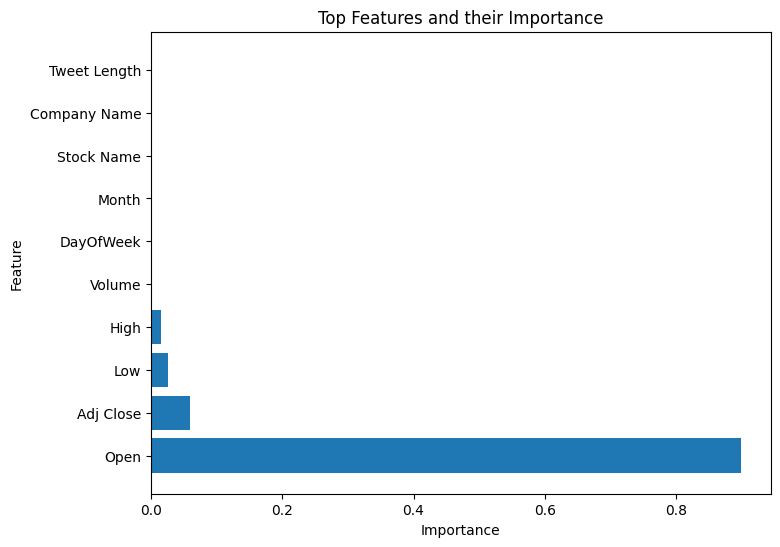

In [113]:
# Plotting the feature importances
plt.figure(figsize=(8, 6))
plt.barh(selected_features_df_RF['Feature'], selected_features_df_RF['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Features and their Importance')
plt.show()

## Feature Selection using Mutual Info Regressor.

In [114]:
# SelectKBest with mutual_info_regression
selector = SelectKBest(mutual_info_regression, k=10)
X_selected_mi = selector.fit_transform(X, Y)
selected_feature_indices_mi = selector.get_support()
selected_feature_mi = X.columns[selected_feature_indices_mi]

In [115]:
# Create a DataFrame to store feature names and their importances for SelectKBest with mutual_info_regression
feature_importance_df_mi = pd.DataFrame({
    'Feature': X.columns,
    'Importance_MI': selector.scores_
})

# Filtering the DataFrame based on selected features for SelectKBest with mutual_info_regression
selected_features_df_mi = feature_importance_df_mi[feature_importance_df_mi['Feature'].isin(selected_feature_mi)]

# Sorting the DataFrame by importance in descending order for SelectKBest with mutual_info_regression
selected_features_df_mi = selected_features_df_mi.sort_values(by='Importance_MI', ascending=False)

# Printing the top features along with their importance for SelectKBest with mutual_info_regression
print("Top Features and their Importance (SelectKBest with mutual_info_regression):")
print(selected_features_df_mi)

Top Features and their Importance (SelectKBest with mutual_info_regression):
            Feature  Importance_MI
3         Adj Close       6.023933
1              High       6.007867
2               Low       6.000489
4            Volume       6.000119
0              Open       5.997454
12            Month       2.376969
11        DayOfWeek       1.589237
6      Company Name       0.214029
5        Stock Name       0.210802
9   Sentiment_score       0.022938


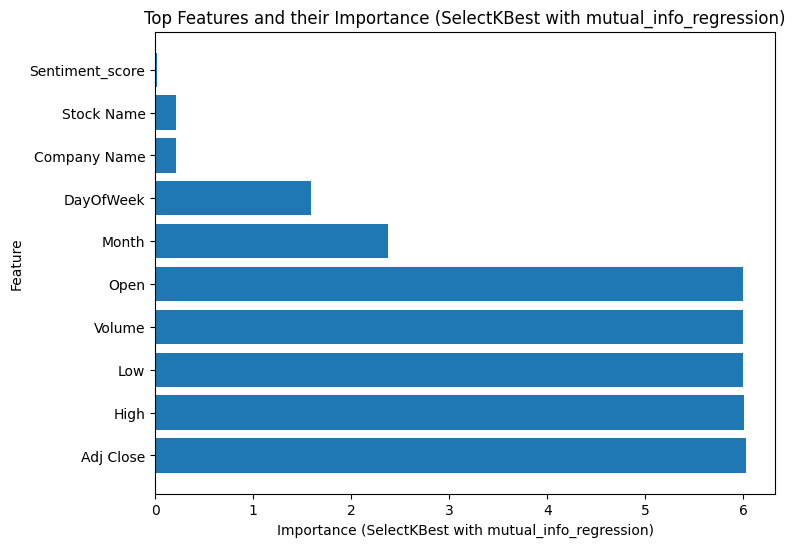

In [116]:
# Plotting the feature importances for SelectKBest with mutual_info_regression
plt.figure(figsize=(8, 6))
plt.barh(selected_features_df_mi['Feature'], selected_features_df_mi['Importance_MI'])
plt.xlabel('Importance (SelectKBest with mutual_info_regression)')
plt.ylabel('Feature')
plt.title('Top Features and their Importance (SelectKBest with mutual_info_regression)')
plt.show()

##Feature Selection using lasso.

In [117]:
from sklearn.linear_model import Lasso
import pandas as pd

alpha = 0.01
lasso = Lasso(alpha=alpha, max_iter=10000)
lasso.fit(X, Y)

# Get the feature coefficients
feature_coefficients = lasso.coef_

# Creating a DataFrame to store feature names and their coefficients
feature_importance_df_lasso = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': feature_coefficients
})

# Finding the indices of the top features based on the absolute coefficient values
top_feature_indices_lasso = feature_importance_df_lasso['Coefficient'].abs().argsort()[-10:][::-1]

# Get the names and coefficients of the selected features
selected_features_lasso = feature_importance_df_lasso.loc[top_feature_indices_lasso, ['Feature', 'Coefficient']]

# Printing the top features along with their coefficients (importance)
print("Top Features and their Coefficients (Lasso):")
print(selected_features_lasso)


Top Features and their Coefficients (Lasso):
            Feature  Coefficient
3         Adj Close     0.946324
2               Low     0.043882
12            Month     0.000000
11        DayOfWeek    -0.000000
10          Z-Score     0.000000
9   Sentiment_score     0.000000
8         Sentiment    -0.000000
7      Tweet Length    -0.000000
6      Company Name     0.000000
5        Stock Name     0.000000


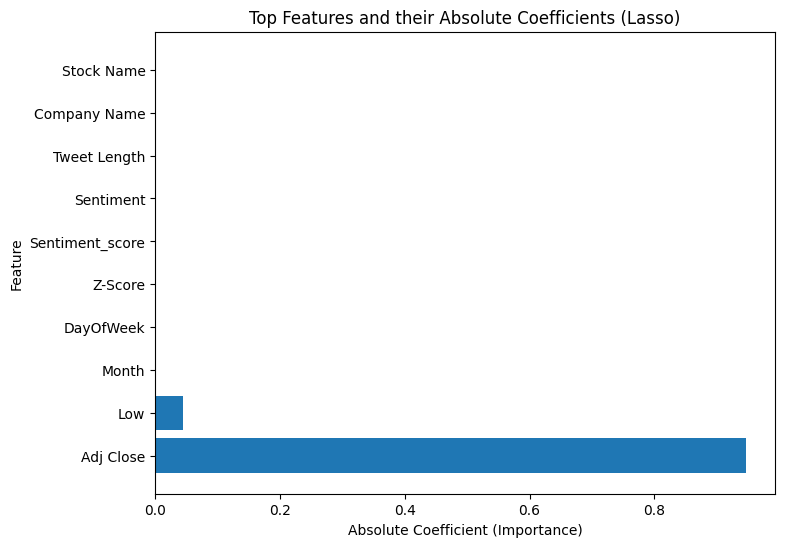

In [118]:
# Plotting the feature importances for Lasso
plt.figure(figsize=(8, 6))
plt.barh(selected_features_lasso['Feature'], selected_features_lasso['Coefficient'].abs())
plt.xlabel('Absolute Coefficient (Importance)')
plt.ylabel('Feature')
plt.title('Top Features and their Absolute Coefficients (Lasso)')
plt.show()

##Feature Selection using selecting the kbest withF_classif

In [119]:
# SelectKBest with f_classif
k = 10
selector_chi2 = SelectKBest(f_classif, k=k)
X_selected_chi2 = selector_chi2.fit_transform(X, Y)
selected_feature_indices_chi2 = selector_chi2.get_support(indices=True)
selected_feature_chi2 = X.columns[selected_feature_indices_chi2]


In [120]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

k = 10
selector_f_classif = SelectKBest(f_classif, k=k)
X_selected_f_classif = selector_f_classif.fit_transform(X, Y)
selected_feature_indices_f_classif = selector_f_classif.get_support(indices=True)
selected_feature_f_classif = X.columns[selected_feature_indices_f_classif]

# Creating a DataFrame to store feature names and their F-statistic values
feature_importance_df_f_classif = pd.DataFrame({
    'Feature': X.columns,
    'F_Stat': selector_f_classif.scores_
})

# Sorting the DataFrame by F-statistic values in descending order
selected_features_df_f_classif = feature_importance_df_f_classif.sort_values(by='F_Stat', ascending=False)

# Printing the top features along with their importance (F-statistic values)
print("Top Features and their Importance (f_classif):")
print(selected_features_df_f_classif.head(k))

Top Features and their Importance (f_classif):
         Feature        F_Stat
3      Adj Close  2.383950e+11
2            Low  5.674686e+09
0           Open  2.822110e+08
1           High  9.343170e+07
4         Volume  2.332449e+04
12         Month  2.019584e+04
11     DayOfWeek  9.210331e+03
5     Stock Name  3.687739e+03
6   Company Name  3.687739e+03
7   Tweet Length  1.882489e+00


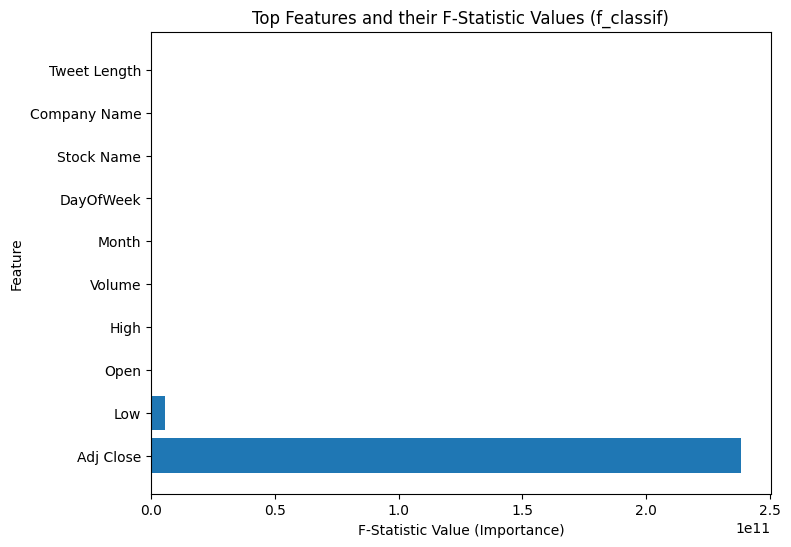

In [121]:
# Plotting the feature importances for f_classif
plt.figure(figsize=(8, 6))
plt.barh(selected_features_df_f_classif['Feature'][:k], selected_features_df_f_classif['F_Stat'][:k])
plt.xlabel('F-Statistic Value (Importance)')
plt.ylabel('Feature')
plt.title('Top Features and their F-Statistic Values (f_classif)')
plt.show()

##Selecting the top features obtained.


In [122]:
selected_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Stock Name','DayOfWeek',
        'Sentiment_score','Month']

# Creating a subset DataFrame by selecting specific columns
enddata = data1[selected_columns]

#Model building based on the selected features.

In [123]:
enddata.head()

,Open,High,Low,Close,Adj Close,Volume,Stock Name,DayOfWeek,Sentiment_score,Month
0,-0.740403,-0.752144,-0.724221,-0.744126,-0.744124,-0.337634,2,3,1.510395,9
1,-0.740403,-0.752144,-0.724221,-0.744126,-0.744124,-0.337634,2,3,-0.738973,9
2,-0.740403,-0.752144,-0.724221,-0.744126,-0.744124,-0.337634,2,3,1.646359,9
3,-0.740403,-0.752144,-0.724221,-0.744126,-0.744124,-0.337634,2,3,-0.394905,9
4,-0.740403,-0.752144,-0.724221,-0.744126,-0.744124,-0.337634,2,3,0.508303,9


In [124]:
X1=enddata.drop("Close",axis=1)

In [125]:
Y1 = enddata['Close']

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

## Linear regression without cross validation Technique.

---



In [127]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_linear = linear_model.predict(X_test)

# Calculating evaluation metrics
mse_linear = mean_squared_error(Y_test, Y_pred_linear)
mae_linear = mean_absolute_error(Y_test, Y_pred_linear)
r2_linear = r2_score(Y_test, Y_pred_linear)

# Creating a DataFrame to store the evaluation metrics
linear_evaluation_df = pd.DataFrame({
    "Model": ["Linear Regression"],
    "Mean Squared Error": [mse_linear],
    "Mean Absolute Error": [mae_linear],
    "R-squared": [r2_linear]
})

# Printing the evaluation DataFrame for Linear Regression
print("Linear Regression Evaluation Metrics:")
print(linear_evaluation_df)

Linear Regression Evaluation Metrics:
               Model  Mean Squared Error  Mean Absolute Error  R-squared
0  Linear Regression        5.379667e-11             0.000003        1.0


##Random Forest Regressor witout Cross Validation technique.

In [128]:
# Initializing the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)

# Fitting the model
random_forest_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_rf = random_forest_model.predict(X_test)

# Calculating evaluation metrics
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
mae_rf = mean_absolute_error(Y_test, Y_pred_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

# Creating a DataFrame to store the evaluation metrics
rf_evaluation_df = pd.DataFrame({
    "Model": ["Random Forest"],
    "Mean Squared Error": [mse_rf],
    "Mean Absolute Error": [mae_rf],
    "R-squared": [r2_rf]
})

# Printing the evaluation DataFrame for Random Forest
print("Random Forest Evaluation Metrics:")
print(rf_evaluation_df)

Random Forest Evaluation Metrics:
           Model  Mean Squared Error  Mean Absolute Error  R-squared
0  Random Forest        8.400081e-10             0.000001        1.0


## Decision Tree Regressor without Cross Valaidation Technique.

In [129]:
# Initializing the Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Fitting the model
decision_tree_model.fit(X_train, Y_train)

# Making predictions on the test set
Y_pred_dt = decision_tree_model.predict(X_test)

# Calculating evaluation metrics
mse_dt = mean_squared_error(Y_test, Y_pred_dt)
mae_dt = mean_absolute_error(Y_test, Y_pred_dt)
r2_dt = r2_score(Y_test, Y_pred_dt)

# Creating a DataFrame to store the evaluation metrics
dt_evaluation_df = pd.DataFrame({
    "Model": ["Decision Tree"],
    "Mean Squared Error": [mse_dt],
    "Mean Absolute Error": [mae_dt],
    "R-squared": [r2_dt]
})

# Printing the evaluation DataFrame for Decision Tree
print("Decision Tree Evaluation Metrics:")
print(dt_evaluation_df)

Decision Tree Evaluation Metrics:
           Model  Mean Squared Error  Mean Absolute Error  R-squared
0  Decision Tree        3.639410e-09             0.000002        1.0


## Support Vector Regressor Without Cross Validation Technique.

In [130]:
# Initializing the Support Vector Regressor (SVR) model
svr_model = SVR()

# Fitting the model
svr_model.fit(X_train, Y_train)

# Making predictions on the test set
Y_pred_svr = svr_model.predict(X_test)

# Calculating evaluation metrics
mse_svr = mean_squared_error(Y_test, Y_pred_svr)
mae_svr = mean_absolute_error(Y_test, Y_pred_svr)
r2_svr = r2_score(Y_test, Y_pred_svr)

# Creating a DataFrame to store the evaluation metrics
svr_evaluation_df = pd.DataFrame({
    "Model": ["Support Vector Regressor"],
    "Mean Squared Error": [mse_svr],
    "Mean Absolute Error": [mae_svr],
    "R-squared": [r2_svr]
})

# Printing the evaluation DataFrame for Support Vector Regressor
print("Support Vector Regressor Evaluation Metrics:")
print(svr_evaluation_df)

Support Vector Regressor Evaluation Metrics:
                      Model  Mean Squared Error  Mean Absolute Error  \
0  Support Vector Regressor            0.002844              0.04552   

   R-squared  
0   0.997181  


## MPL Regressor without Cross Validation Technique.

In [131]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Fitting the model
mlp_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_mlp = mlp_model.predict(X_test)

# Calculating evaluation metrics
mse_mlp = mean_squared_error(Y_test, Y_pred_mlp)
mae_mlp = mean_absolute_error(Y_test, Y_pred_mlp)
r2_mlp = r2_score(Y_test, Y_pred_mlp)

# Creating a DataFrame to store the evaluation metrics
mlp_evaluation_df = pd.DataFrame({
    "Model": ["Multi-Layer Perceptron"],
    "Mean Squared Error": [mse_mlp],
    "Mean Absolute Error": [mae_mlp],
    "R-squared": [r2_mlp]
})

# Printing the evaluation DataFrame for Multi-Layer Perceptron
print("Multi-Layer Perceptron Evaluation Metrics:")
print(mlp_evaluation_df)

Multi-Layer Perceptron Evaluation Metrics:
                    Model  Mean Squared Error  Mean Absolute Error  R-squared
0  Multi-Layer Perceptron            0.000062             0.005807   0.999939


#evaluating the models built without cross Validation technique using MSE, MAE, and Rsqured value

In [132]:
# Concatenating the individual evaluation DataFrames into a single DataFrame
all_models_evaluation_df = pd.concat([linear_evaluation_df, dt_evaluation_df, rf_evaluation_df, svr_evaluation_df,mlp_evaluation_df], ignore_index=True)

# Printing the combined evaluation DataFrame for all models
print("Combined Evaluation Metrics for All Models:")


Combined Evaluation Metrics for All Models:


In [133]:
all_models_evaluation_df

,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Linear Regression,5.379667e-11,0.000003,1.000000
1,Decision Tree,3.639410e-09,0.000002,1.000000
2,Random Forest,8.400081e-10,0.000001,1.000000
3,Support Vector Regressor,2.844336e-03,0.045520,0.997181
4,Multi-Layer Perceptron,6.186282e-05,0.005807,0.999939


#Model building usnig Cross validation technique in order to prevent the overfitting.

##Linear Regression With cross Validation Technique.

In [134]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Creating a Linear Regression model
linear_model = LinearRegression()

# Specifying the evaluation metrics (mean squared error, mean absolute error, and r-squared)
scoring = {
    'neg_mean_squared_error': make_scorer(mean_squared_error),
    'mean_absolute_error': make_scorer(mean_absolute_error),
    'r2': make_scorer(r2_score)
}

# Performing cross-validation
cv_results = cross_validate(linear_model, X1, Y1, cv=5, scoring=scoring)

# Calculating mean scores across folds, using absolute values for MSE
mean_mse = np.mean(np.abs(cv_results['test_neg_mean_squared_error']))
mean_mae = np.mean(cv_results['test_mean_absolute_error'])
mean_r2 = np.mean(cv_results['test_r2'])

# Creating a DataFrame to store the cross-validation results
cv_evaluation_df = pd.DataFrame({
    "Model": ["Linear Regression"],
    "Mean Squared Error (CV)": [mean_mse],
    "Mean Absolute Error (CV)": [mean_mae],
    "R-squared (CV)": [mean_r2]
})

# Printing the cross-validation results
print("Linear Regression Cross-Validation Metrics:")
print(cv_evaluation_df)


Linear Regression Cross-Validation Metrics:
               Model  Mean Squared Error (CV)  Mean Absolute Error (CV)  \
0  Linear Regression             9.666962e-10                  0.000002   

   R-squared (CV)  
0             1.0  


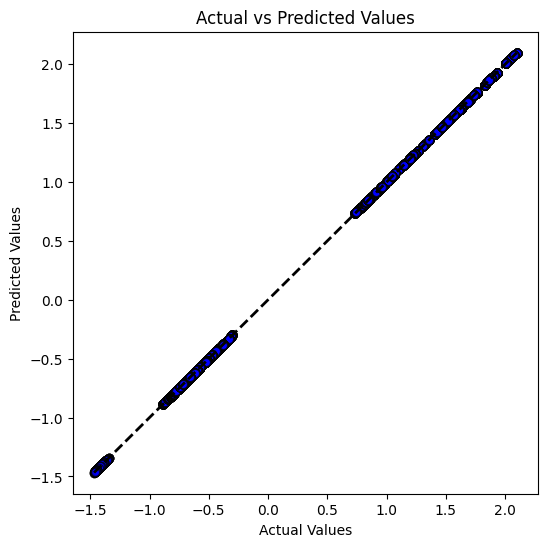

In [135]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

# Creating a Linear Regression model
linear_model = LinearRegression()

# Performing cross-validation and getting predicted values
predicted_values = cross_val_predict(linear_model, X1, Y1, cv=5)

# Plotting actual vs predicted values
plt.figure(figsize=(6, 6))
plt.scatter(Y1, predicted_values, c='blue', edgecolors=(0, 0, 0), alpha=0.7)
plt.plot([Y1.min(), Y1.max()], [Y1.min(), Y1.max()], 'k--', lw=2)  # Diagonal line for reference
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


##Random Forest Regressor With cross Validation Technique.

In [136]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Creating a Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)

# Specifying the evaluation metrics (mean squared error, mean absolute error, and r-squared)
scoring = {
    'neg_mean_squared_error': make_scorer(mean_squared_error),
    'mean_absolute_error': make_scorer(mean_absolute_error),
    'r2': make_scorer(r2_score)
}

# Performing cross-validation
cv_results_rf = cross_validate(random_forest_model, X1, Y1, cv=5, scoring=scoring)

# Calculating mean scores across folds
mean_mse_rf = np.mean(cv_results_rf['test_neg_mean_squared_error'])  # No need to negate here
mean_mae_rf = np.mean(cv_results_rf['test_mean_absolute_error'])
mean_r2_rf = np.mean(cv_results_rf['test_r2'])

# Creating a DataFrame to store the cross-validation results
cv_evaluation_rf_df = pd.DataFrame({
    "Model": ["Random Forest"],
    "Mean Squared Error (CV)": [mean_mse_rf],
    "Mean Absolute Error (CV)": [mean_mae_rf],
    "R-squared (CV)": [mean_r2_rf]
})

# Printing the cross-validation results for Random Forest
print("Random Forest Cross-Validation Metrics:")
print(cv_evaluation_rf_df)


Random Forest Cross-Validation Metrics:
           Model  Mean Squared Error (CV)  Mean Absolute Error (CV)  \
0  Random Forest                 0.015949                  0.041482   

   R-squared (CV)  
0        0.856578  


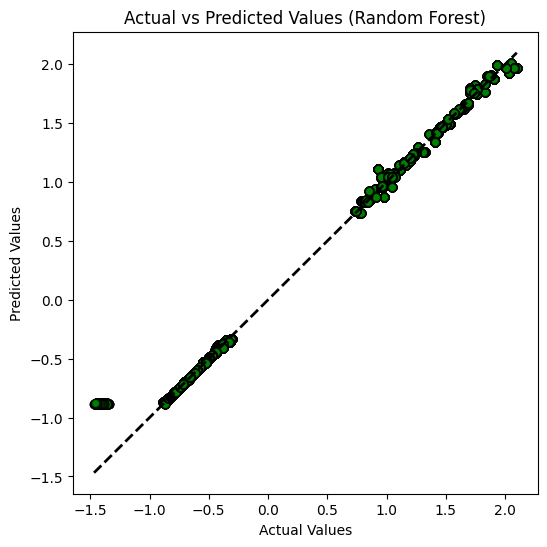

In [137]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

# Creating a Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)

# Performing cross-validation and getting predicted values
predicted_values_rf = cross_val_predict(random_forest_model, X1, Y1, cv=5)

# Plotting actual vs predicted values
plt.figure(figsize=(6, 6))
plt.scatter(Y1, predicted_values_rf, c='green', edgecolors=(0, 0, 0), alpha=0.7)
plt.plot([Y1.min(), Y1.max()], [Y1.min(), Y1.max()], 'k--', lw=2)  # Diagonal line for reference
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


##Decision Tree Regressor With cross Validation Technique.

In [138]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Creating a Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Specifying the evaluation metrics (mean squared error, mean absolute error, and r-squared)
scoring = {
    'neg_mean_squared_error': make_scorer(mean_squared_error),
    'mean_absolute_error': make_scorer(mean_absolute_error),
    'r2': make_scorer(r2_score)
}

# Performing cross-validation
cv_results_dt = cross_validate(decision_tree_model, X1, Y1, cv=5, scoring=scoring)

# Calculating mean scores across folds, using absolute values for MSE
mean_mse_dt = np.mean(np.abs(cv_results_dt['test_neg_mean_squared_error']))
mean_mae_dt = np.mean(cv_results_dt['test_mean_absolute_error'])
mean_r2_dt = np.mean(cv_results_dt['test_r2'])

# Creating a DataFrame to store the cross-validation results
cv_evaluation_dt_df = pd.DataFrame({
    "Model": ["Decision Tree"],
    "Mean Squared Error (CV)": [mean_mse_dt],
    "Mean Absolute Error (CV)": [mean_mae_dt],
    "R-squared (CV)": [mean_r2_dt]
})

# Printing the cross-validation results for Decision Tree
print("Decision Tree Cross-Validation Metrics:")
print(cv_evaluation_dt_df)


Decision Tree Cross-Validation Metrics:
           Model  Mean Squared Error (CV)  Mean Absolute Error (CV)  \
0  Decision Tree                 0.016055                  0.041548   

   R-squared (CV)  
0        0.855845  


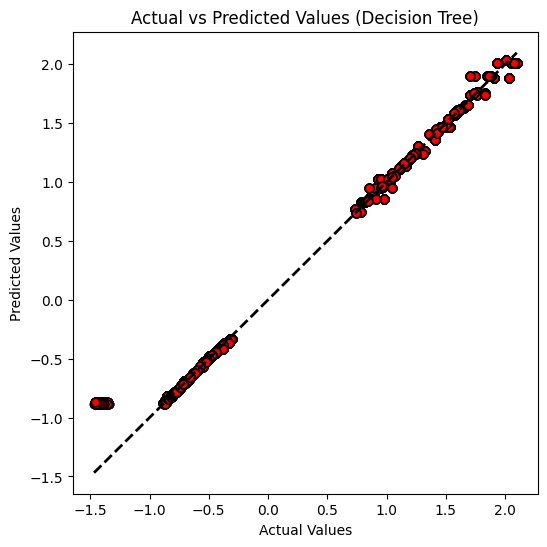

In [139]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

# Creating a Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Performing cross-validation and getting predicted values
predicted_values_dt = cross_val_predict(decision_tree_model, X1, Y1, cv=5)

# Plotting actual vs predicted values
plt.figure(figsize=(6, 6))
plt.scatter(Y1, predicted_values_dt, c='red', edgecolors=(0, 0, 0), alpha=0.7)
plt.plot([Y1.min(), Y1.max()], [Y1.min(), Y1.max()], 'k--', lw=2)  # Diagonal line for reference
plt.title('Actual vs Predicted Values (Decision Tree)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


##support vector regressor With cross Validation Technique.

In [140]:
from sklearn.model_selection import cross_validate
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Creating a Support Vector Regressor (SVR) model
svr_model = SVR()

# Specifying the evaluation metrics (mean squared error, mean absolute error, and r-squared)
scoring = {
    'neg_mean_squared_error': make_scorer(mean_squared_error),
    'mean_absolute_error': make_scorer(mean_absolute_error),
    'r2': make_scorer(r2_score)
}

# Performing cross-validation
cv_results_svr = cross_validate(svr_model, X1, Y1, cv=5, scoring=scoring)

# Calculating mean scores across folds, using absolute values for MSE
mean_mse_svr = np.mean(np.abs(cv_results_svr['test_neg_mean_squared_error']))
mean_mae_svr = np.mean(cv_results_svr['test_mean_absolute_error'])
mean_r2_svr = np.mean(cv_results_svr['test_r2'])

# Creating a DataFrame to store the cross-validation results
cv_evaluation_svr_df = pd.DataFrame({
    "Model": ["Support Vector Regressor"],
    "Mean Squared Error (CV)": [mean_mse_svr],
    "Mean Absolute Error (CV)": [mean_mae_svr],
    "R-squared (CV)": [mean_r2_svr]
})

# Printing the cross-validation results for Support Vector Regressor
print("Support Vector Regressor Cross-Validation Metrics:")
print(cv_evaluation_svr_df)


Support Vector Regressor Cross-Validation Metrics:
                      Model  Mean Squared Error (CV)  \
0  Support Vector Regressor                 0.012834   

   Mean Absolute Error (CV)  R-squared (CV)  
0                  0.073812        0.922188  


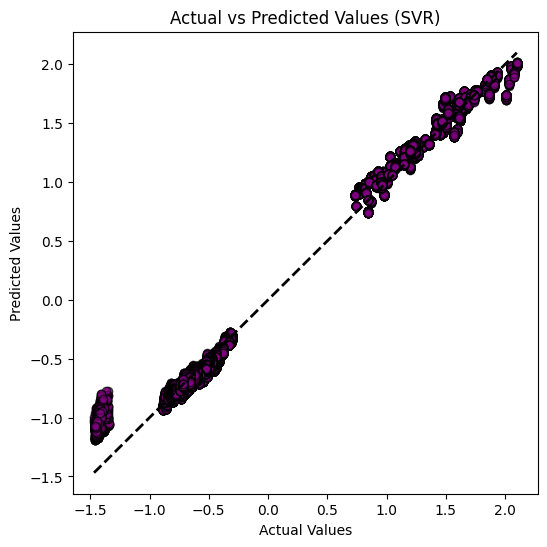

In [141]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

# Creating a Support Vector Regressor (SVR) model
svr_model = SVR()

# Performing cross-validation and getting predicted values
predicted_values_svr = cross_val_predict(svr_model, X1, Y1, cv=5)

# Plotting actual vs predicted values
plt.figure(figsize=(6, 6))
plt.scatter(Y1, predicted_values_svr, c='purple', edgecolors=(0, 0, 0), alpha=0.7)
plt.plot([Y1.min(), Y1.max()], [Y1.min(), Y1.max()], 'k--', lw=2)  # Diagonal line for reference
plt.title('Actual vs Predicted Values (SVR)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


##Multi layer perceptron Regressor With cross Validation Technique.

In [142]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Initializing the Multi-Layer Perceptron model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Specifying the evaluation metrics (negative mean squared error, mean absolute error, and r-squared)
scoring = {
    'neg_mean_squared_error': make_scorer(mean_squared_error),
    'neg_mean_absolute_error': make_scorer(mean_absolute_error),  # Note the negation here
    'r2': make_scorer(r2_score)
}

# Performing cross-validation
cv_results_mlp = cross_validate(mlp_model, X1, Y1, cv=5, scoring=scoring)

# Calculating mean scores across folds
mean_mse_mlp = -cv_results_mlp['test_neg_mean_squared_error'].mean()  # Negate to get positive MSE
mean_mae_mlp = -cv_results_mlp['test_neg_mean_absolute_error'].mean()  # Negate to get positive MAE
mean_r2_mlp = cv_results_mlp['test_r2'].mean()                       # R-squared is typically reported as is

# Creating a DataFrame to store the cross-validation results
cv_evaluation_mlp_df = pd.DataFrame({
    "Model": ["Multi-Layer Perceptron"],
    "Mean Squared Error (CV)": [-mean_mse_mlp],  # Negate here to get positive MSE
    "Mean Absolute Error (CV)": [-mean_mae_mlp],  # Negate here to get positive MAE
    "R-squared (CV)": [mean_r2_mlp]
})

# Printing the cross-validation results for Multi-Layer Perceptron
print("Multi-Layer Perceptron Cross-Validation Metrics:")
print(cv_evaluation_mlp_df)


Multi-Layer Perceptron Cross-Validation Metrics:
                    Model  Mean Squared Error (CV)  Mean Absolute Error (CV)  \
0  Multi-Layer Perceptron                 0.001629                  0.026806   

   R-squared (CV)  
0         0.99246  


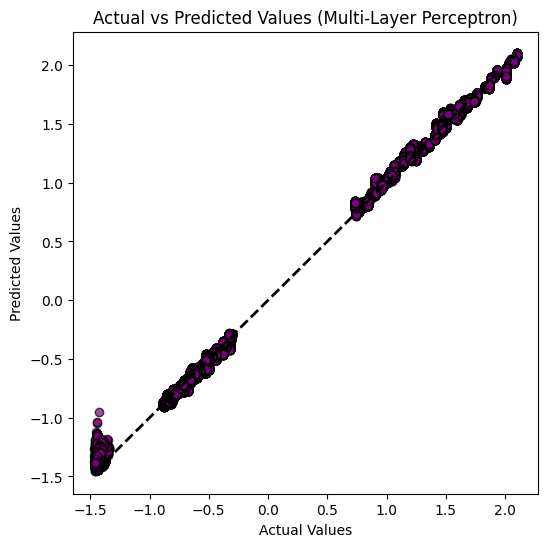

In [143]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

# Initializing the Multi-Layer Perceptron model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Performing cross-validation and getting predicted values
predicted_values_mlp = cross_val_predict(mlp_model, X1, Y1, cv=5)

# Plotting actual vs predicted values
plt.figure(figsize=(6, 6))
plt.scatter(Y1, predicted_values_mlp, c='purple', edgecolors=(0, 0, 0), alpha=0.7)
plt.plot([Y1.min(), Y1.max()], [Y1.min(), Y1.max()], 'k--', lw=2)  # Diagonal line for reference
plt.title('Actual vs Predicted Values (Multi-Layer Perceptron)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


##Evaluating the model built with Cross Validation Technique using MSE, MAE, Rsquared Value.

In [144]:
  # Concatenate the individual evaluation DataFrames into a single DataFrame
all_models_evaluation_df1 = pd.concat([cv_evaluation_df, cv_evaluation_rf_df, cv_evaluation_dt_df, cv_evaluation_svr_df,cv_evaluation_mlp_df], ignore_index=True)

# Print the combined evaluation DataFrame for all models
print("Combined Evaluation Metrics for All Models:")


Combined Evaluation Metrics for All Models:


In [145]:
all_models_evaluation_df1

,Model,Mean Squared Error (CV),Mean Absolute Error (CV),R-squared (CV)
0,Linear Regression,9.666962e-10,0.000002,1.000000
1,Random Forest,1.594859e-02,0.041482,0.856578
2,Decision Tree,1.605484e-02,0.041548,0.855845
3,Support Vector Regressor,1.283436e-02,0.073812,0.922188
4,Multi-Layer Perceptron,1.629227e-03,0.026806,0.992460


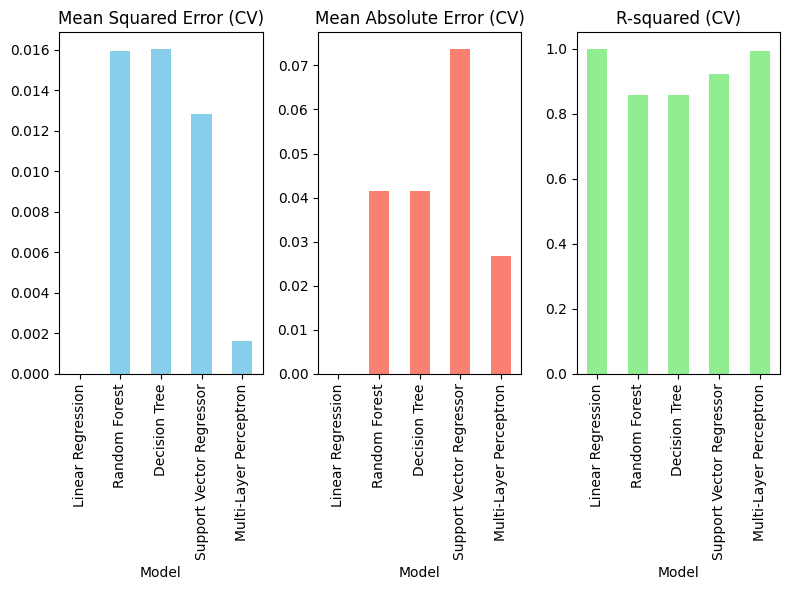

In [146]:
# Set the models as the index for better plotting
all_models_evaluation_df1.set_index("Model", inplace=True)

# Plotting Mean Squared Error
plt.figure(figsize=(8, 6))
plt.subplot(1, 3, 1)
all_models_evaluation_df1['Mean Squared Error (CV)'].plot(kind='bar', color='skyblue')
plt.title('Mean Squared Error (CV)')

# Plotting Mean Absolute Error
plt.subplot(1, 3, 2)
all_models_evaluation_df1['Mean Absolute Error (CV)'].plot(kind='bar', color='salmon')
plt.title('Mean Absolute Error (CV)')

# Plotting R-squared
plt.subplot(1, 3, 3)
all_models_evaluation_df1['R-squared (CV)'].plot(kind='bar', color='lightgreen')
plt.title('R-squared (CV)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#Final Model. - Random Forest Regressor.

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd


# Creating a Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)

# Specifying the evaluation metrics (mean squared error, mean absolute error, and r-squared)
scoring = {
    'neg_mean_squared_error': make_scorer(mean_squared_error),
    'mean_absolute_error': make_scorer(mean_absolute_error),
    'r2': make_scorer(r2_score)
}

# Performing cross-validated predictions
cv_predictions_rf = cross_val_predict(random_forest_model, X1, Y1, cv=5)

# Printing the first 10 actual and predicted values
print("Actual Values:", Y1.head(10).tolist())
print("Predicted Values (Cross-Validation):", cv_predictions_rf[:10])


Actual Values: [-0.7441258468039093, -0.7441258468039093, -0.7441258468039093, -0.7441258468039093, -0.7441258468039093, -0.7441258468039093, -0.7441258468039093, -0.7441258468039093, -0.7441258468039093, -0.7441258468039093]
Predicted Values (Cross-Validation): [-0.74354541 -0.74354541 -0.74354541 -0.74354541 -0.74354541 -0.74354541
 -0.74354541 -0.74354541 -0.74354541 -0.74354541]


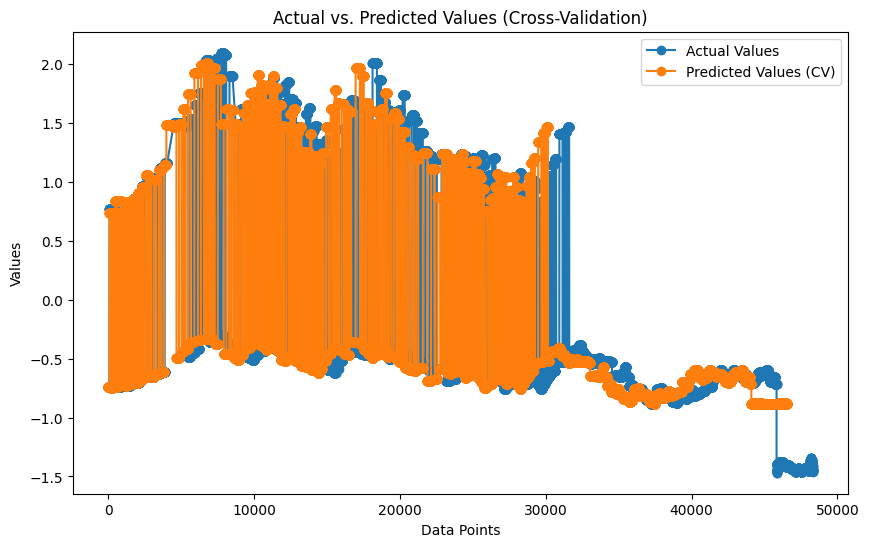

In [148]:
# Plotting actual vs predicted values for the entire dataset
plt.figure(figsize=(10, 6))
plt.plot(Y1, label='Actual Values', marker='o')
plt.plot(cv_predictions_rf, label='Predicted Values (CV)', marker='o')  # Assuming you have predicted_values_svr
plt.title('Actual vs. Predicted Values (Cross-Validation)')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()


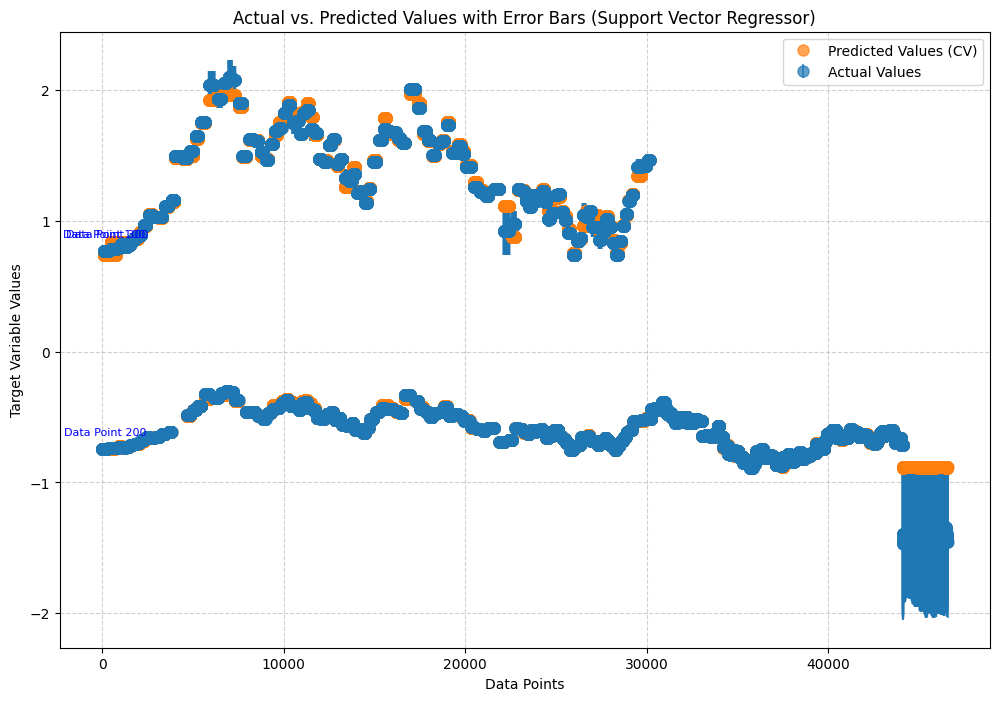

In [149]:
# Calculating the residuals for the entire dataset
residuals = Y1 - cv_predictions_rf

# Plotting error bars for the entire dataset
plt.figure(figsize=(12, 8))
plt.errorbar(range(1, len(Y1) + 1), Y1, yerr=np.abs(residuals), fmt='o', label='Actual Values', alpha=0.7, markersize=8)
plt.plot(range(1, len(cv_predictions_rf) + 1), cv_predictions_rf, 'o', label='Predicted Values (CV)', alpha=0.7, markersize=8)
plt.title('Actual vs. Predicted Values with Error Bars (Support Vector Regressor)')
plt.xlabel('Data Points')
plt.ylabel('Target Variable Values')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Annotate the plot with a sample of data points
annotate_points = [100, 200, 300]  # Choose some indices to annotate
for point in annotate_points:
    plt.annotate(f'Data Point {point}',
                 (point, Y1.iloc[point - 1]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                 fontsize=8,
                 color='blue')

plt.show()


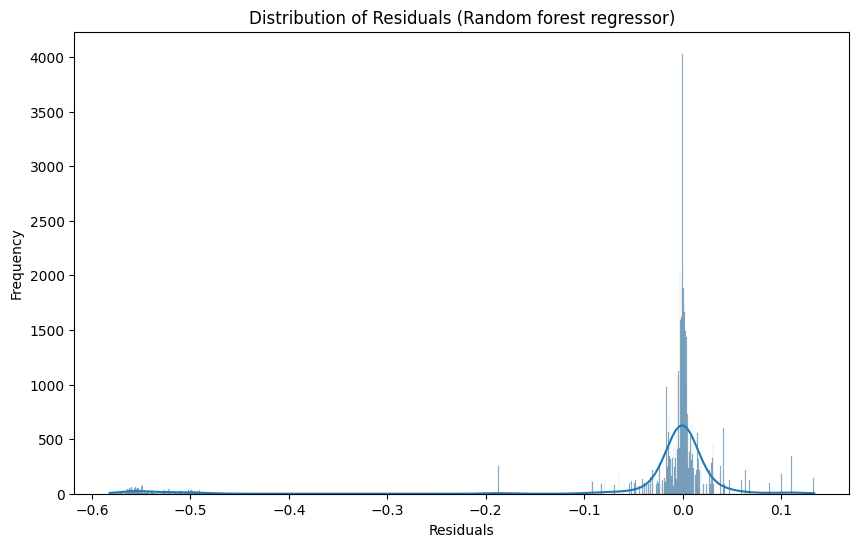

In [150]:
# Calculate residuals for the entire dataset
residuals = Y1 - cv_predictions_rf

# Plotting the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals (Random forest regressor)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


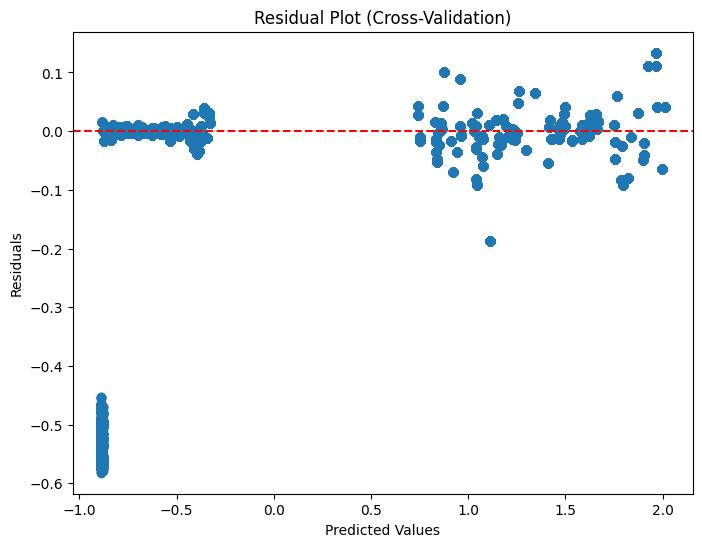

In [151]:
# Calculating residuals
residuals = Y1 - cv_predictions_rf

# Creating a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(cv_predictions_rf, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Cross-Validation)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


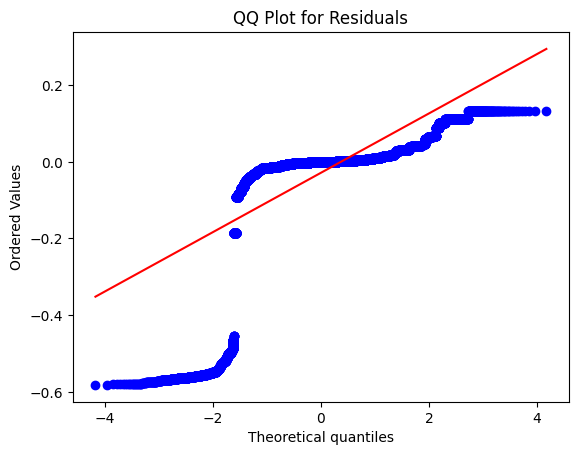

In [152]:
# Creating a QQ plot
residuals = Y1 - cv_predictions_rf
probplot(residuals, plot=plt)
plt.title("QQ Plot for Residuals")
plt.show()